In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


The retailer wanted the answer for:

 1. “Can we accurately predict the stock levels of products based on sales data and sensor data on an hourly basis in order to more intelligently procure products from our suppliers?”

 2. "How to better stock the items that they sell?”

**the above question can be solved using customer segmentation using unsupervised learning in terms of clustering techniques.**

In [239]:
df1_stock= pd.read_csv("/content/sensor_stock_levels.csv") # loading sensor stock levels data

In [240]:
df1=pd.read_csv("/content/sample_sales_data.csv") # loading sales data

In [ ]:
df2=pd.read_csv("/content/sensor_storage_temperature.csv") # loading sensor storage temperature

In [241]:
df1_stock.head()              #sensor_stock_levels data information '''

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
0,0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [ ]:
# I dropped the column ["Unnamed:  0"] for data analysis
#df1_stock=df1_stock.drop(["Unnamed: 0"],axis=1)
#df1_stock

In [242]:
df1_stock.describe(include="all")  # 89845097-f0ec-4702-bb65-85c67cf94490(frequent product_id)

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct
count,15000.000000,15000,15000,15000,15000.000000
unique,NaN,15000,14611,300,NaN
top,NaN,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-05 17:07:33,89845097-f0ec-4702-bb65-85c67cf94490,NaN
freq,NaN,1,3,89,NaN
mean,7499.500000,NaN,NaN,NaN,0.502735
std,4330.271354,NaN,NaN,NaN,0.286842
min,0.000000,NaN,NaN,NaN,0.010000
25%,3749.750000,NaN,NaN,NaN,0.260000
50%,7499.500000,NaN,NaN,NaN,0.500000
75%,11249.250000,NaN,NaN,NaN,0.750000


In [243]:
df2.head()

,Unnamed: 0,id,timestamp,temperature,date,Time,hour,minute,second
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96,2022-03-07,1900-01-01 15:55:20,15,55,20
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88,2022-03-01,1900-01-01 09:18:22,9,18,22
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78,2022-03-04,1900-01-01 15:12:26,15,12,26
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18,2022-03-02,1900-01-01 12:30:42,12,30,42
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38,2022-03-05,1900-01-01 09:09:33,9,9,33


In [ ]:
# I wanted to drop column [Unnamed: 0] for better analysis here
#df2=df2.drop(["Unnamed: 0"],axis=1)
#df2

In [244]:
df2.describe(include="all")

<ipython-input-244-41943b3eaacd>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df2.describe(include="all")


,Unnamed: 0,id,timestamp,temperature,date,Time,hour,minute,second
count,23890.000000,23890,23890,23890.000000,23890,23890,23890.000000,23890.000000,23890.000000
unique,NaN,23890,23890,NaN,7,18462,NaN,NaN,NaN
top,NaN,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,NaN,2022-03-03,1900-01-01 15:10:50,NaN,NaN,NaN
freq,NaN,1,1,NaN,3454,5,NaN,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,1900-01-01 09:00:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,1900-01-01 19:59:59,NaN,NaN,NaN
mean,11944.500000,NaN,NaN,-0.207075,NaN,NaN,13.988824,29.273964,29.400544
std,6896.593302,NaN,NaN,11.217649,NaN,NaN,3.161761,17.314271,17.372464
min,0.000000,NaN,NaN,-30.990000,NaN,NaN,9.000000,0.000000,0.000000
25%,5972.250000,NaN,NaN,-2.860000,NaN,NaN,11.000000,14.000000,14.000000


In [245]:
#set(df2["temperature"])
df2["temperature"].value_counts().head(20)
#df2["temperature"].value_counts().idxmax()       #shows most frequent temperature from df2 dataframe

 0.86    51
-1.65    49
-3.68    49
-3.49    48
-3.39    47
-3.29    46
 0.56    46
-1.40    46
-2.41    46
 2.66    46
 1.93    45
 1.57    45
 2.51    45
 2.98    45
 2.87    45
-2.85    44
-1.26    44
 1.96    44
-3.89    43
-2.37    43
Name: temperature, dtype: int64

In [246]:
#set(df2["timestamp"]).value_counts()
df2["timestamp"].value_counts().head()

2022-03-07 15:55:20    1
2022-03-03 14:57:14    1
2022-03-06 14:28:41    1
2022-03-03 16:40:40    1
2022-03-03 19:42:53    1
Name: timestamp, dtype: int64

In [247]:
df2["timestamp"].value_counts().idxmax() # shows last time at which measurement has been stopped calculated by the retailer

'2022-03-07 15:55:20'

In [248]:
set(df2["id"])

{'bb41500d-cea9-49ec-a1ac-96ec52c9e11c',
 'c50ac37c-c5f4-4a21-a8db-52f23f9797ff',
 '651c7dfc-82b6-4772-8eee-3b8332b3b711',
 'c7c2300e-b7e3-4f47-a211-75bec537c892',
 'abdcbd25-ef22-444d-8568-2b70f493b891',
 '9f7bbd19-7159-4103-a50a-70c0e9a1dccb',
 'b660576b-fe78-4c56-950f-447822704caf',
 'ad28b3c4-60c5-4f91-b973-bd91047c69bc',
 '64529619-940d-48d4-9377-6ade168c974c',
 '2910a8ae-0675-48cc-84db-27a567e2532e',
 'd41c5da8-5a30-4dee-9f38-6cb6b9348a17',
 '19cf31db-425f-4949-a897-6759401faddd',
 '8915c859-31f0-4406-baf2-b69d6617574e',
 '43295155-1fe5-4610-9d4d-908b8770fa22',
 'f930501e-e853-43d5-8efd-7ff16ce98d9c',
 'eb7831d8-da26-4d44-b5ae-e4b4d2a962b9',
 '017e7b79-cada-4b9c-ad6c-635d0688d379',
 '57614853-dedb-4b04-9b5d-a43a34824d7a',
 'a8e39300-9a83-4ea0-a628-6a0aa773ab8d',
 'bda81a6a-4080-4bdf-a866-38224a318d74',
 '9f2f5fa8-c7cb-4aaa-9df8-51ba8b4048db',
 'afbd9ef8-0dab-4b55-b87d-b10c15dcfd24',
 '8e93b974-a551-44bc-b1f8-6beb23c4d77a',
 '34b5c7c2-cf3b-475d-8e69-e088c7ca48bb',
 '8e1af593-0736-

In [249]:
df2["id"].value_counts().head(5)

d1ca1ef8-0eac-42fc-af80-97106efc7b13    1
c686838c-d442-4cbd-ab0a-55f78fe9dcaf    1
0e9215cd-6ead-4aa5-97bb-482b3ada0fe9    1
446247d5-d2a3-4492-a611-f4b49e8cfac2    1
7d9c4918-41b3-472a-b1b3-126e827e8623    1
Name: id, dtype: int64

In [250]:
df2["id"].value_counts().idxmax()

'd1ca1ef8-0eac-42fc-af80-97106efc7b13'

shows the last customer when the measurement has been taken was with the id 'd1ca1ef8-0eac-42fc-af80-97106efc7b13' from the store that was at '2022-03-07','15:55:20'.



In [251]:
df1.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [ ]:
#df1=df1.drop(["Unnamed: 0"], axis=1)
#df1

In [252]:
set(df1["category"])   # shows all the category from sales data

{'baby products',
 'baked goods',
 'baking',
 'beverages',
 'canned foods',
 'cheese',
 'cleaning products',
 'condiments and sauces',
 'dairy',
 'frozen',
 'fruit',
 'kitchen',
 'meat',
 'medicine',
 'packaged foods',
 'personal care',
 'pets',
 'refrigerated items',
 'seafood',
 'snacks',
 'spices and herbs',
 'vegetables'}

In [253]:
df1["category"].value_counts().idxmax()  # most frequent category from sales dataset

'fruit'

In [254]:
df1["transaction_id"].value_counts().head()  # all the values in transaction id are unique

a1c82654-c52c-45b3-8ce8-4c2a1efe63ed    1
6532e258-95fd-4eb5-8c67-2bfb879a8fec    1
6fce2af3-47a0-4755-99c9-0cefb5ab6f41    1
6476e388-3990-471f-b415-3ee59ae18832    1
10afe89b-c45b-49a2-b0be-dec89a4c3f80    1
Name: transaction_id, dtype: int64

In [255]:
df1["customer_type"].value_counts()      # count of all customer_type

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64

In [256]:
df1["timestamp"].value_counts().head(5)

2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
Name: timestamp, dtype: int64

In [257]:
df1["payment_type"].value_counts()

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64

In [258]:
df1["unit_price"].value_counts().head(10)

3.99    374
4.99    374
1.49    321
0.49    306
8.19    272
8.99    272
0.19    264
2.49    251
7.19    235
4.49    230
Name: unit_price, dtype: int64

In [259]:
df1["quantity"].value_counts()

1    1979
4    1976
3    1954
2    1920
Name: quantity, dtype: int64

In [260]:
df1["total"].value_counts()

14.97    104
3.99     103
11.97     98
4.99      94
19.96     94
        ... 
60.57      2
47.98      2
17.99      2
20.19      1
35.98      1
Name: total, Length: 256, dtype: int64

In [261]:
df1["payment_type"].value_counts()

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64

In [262]:
df1[["category","total"]].value_counts().tail(20)


category          total
frozen            26.98    1
baking            28.76    1
personal care     7.49     1
frozen            26.97    1
beverages         7.49     1
spices and herbs  20.76    1
personal care     10.98    1
seafood           35.98    1
spices and herbs  6.98     1
personal care     10.99    1
                  12.19    1
                  13.47    1
spices and herbs  8.76     1
                  10.38    1
frozen            10.98    1
spices and herbs  10.98    1
                  12.57    1
                  15.57    1
personal care     24.38    1
cheese            29.98    1
dtype: int64

In [263]:
df1[["category","total"]].value_counts().idxmax()

('fruit', 3.99)

In [264]:
df1[["category","payment_type"]].value_counts().idxmax()

('fruit', 'e-wallet')

In [265]:
df1[["category","payment_type"]].value_counts().tail(5)

category          payment_type
spices and herbs  e-wallet        35
pets              e-wallet        35
spices and herbs  cash            33
                  debit card      31
                  credit card     26
dtype: int64

In [266]:
df1[["category","payment_type"]].value_counts().head(50)

category            payment_type
fruit               e-wallet        272
                    credit card     264
                    debit card      252
vegetables          debit card      231
                    cash            222
fruit               cash            210
vegetables          e-wallet        197
                    credit card     196
packaged foods      cash            142
                    debit card      135
                    credit card     122
baked goods         cash            120
canned foods        e-wallet        117
baked goods         credit card     115
refrigerated items  cash            113
                    credit card     111
packaged foods      e-wallet        108
baked goods         e-wallet        107
refrigerated items  e-wallet        107
canned foods        credit card     105
meat                cash            105
canned foods        cash            105
                    debit card      104
meat                e-wallet        103
baked g

In [267]:
df1[["customer_type","category"]].value_counts().head(30)
# seems fruits win in all customer_type following by vegetables, goods, foods and items

customer_type  category          
standard       fruit                 222
premium        fruit                 206
gold           fruit                 197
non-member     fruit                 187
basic          fruit                 186
premium        vegetables            182
non-member     vegetables            177
gold           vegetables            174
basic          vegetables            160
standard       vegetables            153
               baked goods           109
basic          packaged foods        106
premium        packaged foods        104
non-member     refrigerated items    102
standard       packaged foods        102
non-member     packaged foods        101
gold           packaged foods         94
premium        canned foods           93
basic          refrigerated items     90
premium        baked goods            89
basic          canned foods           89
non-member     canned foods           88
basic          baked goods            87
               kitchen 

In [268]:
B_train1 = B_train1.to_numpy()

In [269]:
df1[["customer_type","payment_type"]].value_counts()

customer_type  payment_type
premium        cash            434
non-member     cash            434
standard       cash            428
gold           e-wallet        418
non-member     debit card      402
standard       credit card     396
non-member     credit card     396
basic          debit card      391
gold           credit card     389
premium        debit card      388
               e-wallet        386
standard       e-wallet        386
basic          credit card     386
standard       debit card      385
premium        credit card     382
basic          e-wallet        376
               cash            373
non-member     e-wallet        369
gold           cash            358
               debit card      352
dtype: int64

In [ ]:
'''df1_rev=pd.get_dummies(df1["payment_type"])
df1_rev'''

,cash,credit card,debit card,e-wallet
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
7824,0,0,0,1
7825,0,1,0,0
7826,0,1,0,0
7827,1,0,0,0


In [ ]:
'''df1_rev1=pd.get_dummies(df1[["payment_type","customer_type","category","product_id"]])
df1_rev1'''

'df1_rev1=pd.get_dummies(df1[["payment_type","customer_type","category","product_id"]])\ndf1_rev1'

In [270]:
df1[["total","payment_type"]].value_counts().head(10)
# for smaller values customers prefer cards(credit,debit) over e-wallet and cash

total  payment_type
14.97  e-wallet        36
3.99   credit card     33
11.97  e-wallet        31
4.99   credit card     30
4.47   e-wallet        29
3.99   debit card      28
32.76  cash            28
7.98   cash            28
0.98   cash            27
3.99   e-wallet        27
dtype: int64

In [271]:
df1[["category","payment_type"]].value_counts().idxmax()

('fruit', 'e-wallet')

In [272]:
df1[["quantity","payment_type"]].value_counts().head(10)

quantity  payment_type
4         cash            550
3         e-wallet        511
1         e-wallet        510
          credit card     506
2         cash            502
4         credit card     498
          debit card      496
3         cash            495
          debit card      488
2         credit card     485
dtype: int64

**Need to join all the dataframes for better analysis and visualization process. this can be done by using inner join where timestamp of df1=df1_stock=df2.**

**For the first question, stock = df1+df1_stock has been done to give the solution for the asked question**

In [273]:
df1.columns

Index(['Unnamed: 0', 'transaction_id', 'timestamp', 'product_id', 'category',
       'customer_type', 'unit_price', 'quantity', 'total', 'payment_type'],
      dtype='object')

In [276]:
df2.columns

Index(['Unnamed: 0', 'id', 'timestamp', 'temperature', 'date', 'Time', 'hour',
       'minute', 'second'],
      dtype='object')

In [277]:
df1_stock.columns

Index(['Unnamed: 0', 'id', 'timestamp', 'product_id', 'estimated_stock_pct'], dtype='object')

**expanding counts of df2 dataframe**

In [278]:
df2["temperature"].value_counts() # seems retailer wantts to reduce electricity consumption as much

 0.86     51
-1.65     49
-3.68     49
-3.49     48
-3.39     47
          ..
 34.99     1
 29.50     1
 23.39     1
 16.80     1
 34.27     1
Name: temperature, Length: 3140, dtype: int64

In [280]:
df1.describe(include="all") # descriptive statistics with respect to each predictor.  # statistics for df1 dataframe


,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
count,7829.000000,7829,7829,7829,7829,7829,7829.000000,7829.000000,7829.000000,7829
unique,NaN,7829,7738,300,22,5,NaN,NaN,NaN,4
top,NaN,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 19:32:20,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,fruit,non-member,NaN,NaN,NaN,cash
freq,NaN,1,2,114,998,1601,NaN,NaN,NaN,2027
mean,3914.000000,NaN,NaN,NaN,NaN,NaN,7.819480,2.501597,19.709905,NaN
std,2260.181962,NaN,NaN,NaN,NaN,NaN,5.388088,1.122722,17.446680,NaN
min,0.000000,NaN,NaN,NaN,NaN,NaN,0.190000,1.000000,0.190000,NaN
25%,1957.000000,NaN,NaN,NaN,NaN,NaN,3.990000,1.000000,6.570000,NaN
50%,3914.000000,NaN,NaN,NaN,NaN,NaN,7.190000,3.000000,14.970000,NaN
75%,5871.000000,NaN,NaN,NaN,NaN,NaN,11.190000,4.000000,28.470000,NaN


This shows that the most frequent customers are from timestamp(2022-03-02 19:32:20) with frequency/count 2,product_id(ecac012c-1dec-41d4-9ebd-56fb7166f6d9) with frequency/count 114, category(fruit) with frequency/count 998, customer_type(non-member) with frequency/count 1601 and payment_type(cash) with frequency/count 2027.



Working on timestamp to seggregate time into days, month, hours, minutes

In [281]:
# splitting 'timestamp' into two different columns "date" and "Time" for better processing in EDA
df1["date"]= pd.to_datetime(df1['timestamp']).dt.date
df1["Time"]= pd.to_datetime(df1["timestamp"]).dt.time


In [282]:
# splitting 'timestamp' into two different columns "date" and "Time" for better processing in EDA
df2["date"]= pd.to_datetime(df2['timestamp']).dt.date
df2["Time"]= pd.to_datetime(df2["timestamp"]).dt.time


In [284]:
# splitting 'timestamp' into two different columns "date" and "Time" for better processing in EDA
df1_stock["date"]= pd.to_datetime(df1_stock['timestamp']).dt.date
df1_stock["Time"]= pd.to_datetime(df1_stock["timestamp"]).dt.time


In [285]:
df1['Time'] = pd.to_datetime(df1['Time'], format='%H:%M:%S')

In [286]:
df2['Time'] = pd.to_datetime(df2['Time'], format='%H:%M:%S')

In [287]:
df1_stock['Time'] = pd.to_datetime(df1_stock['Time'], format='%H:%M:%S')
#df1['Time'] = df1['Time'].dt.strftime('%H-%M-%S')

In [288]:
df1["hour"]=df1["Time"].dt.hour
df1["minute"]=df1["Time"].dt.minute
df1["second"]=df1["Time"].dt.second


#df1[['hour', 'minute','second']] = df1['Time'].str.split(":")
#df['datetime'] = pd.to_datetime(df['time'])

In [289]:
df2["hour"]=df2["Time"].dt.hour
df2["minute"]=df2["Time"].dt.minute
df2["second"]=df2["Time"].dt.second


#df1[['hour', 'minute','second']] = df1['Time'].str.split(":")
#df['datetime'] = pd.to_datetime(df['time'])

In [290]:
df1_stock["hour"]=df1_stock["Time"].dt.hour
df1_stock["minute"]=df1_stock["Time"].dt.minute
df1_stock["second"]=df1_stock["Time"].dt.second


#df1[['hour', 'minute','second']] = df1['Time'].str.split(":")
#df['datetime'] = pd.to_datetime(df['time'])

In [291]:
df1_stock.head() # time formatting is incorrect here

,Unnamed: 0,id,timestamp,product_id,estimated_stock_pct,date,Time,hour,minute,second
0,0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75,2022-03-07,1900-01-01 12:13:02,12,13,2
1,1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48,2022-03-07,1900-01-01 16:39:46,16,39,46
2,2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58,2022-03-01,1900-01-01 18:17:43,18,17,43
3,3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79,2022-03-02,1900-01-01 14:29:09,14,29,9
4,4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22,2022-03-02,1900-01-01 13:46:18,13,46,18


In [292]:
df2.head()

,Unnamed: 0,id,timestamp,temperature,date,Time,hour,minute,second
0,0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96,2022-03-07,1900-01-01 15:55:20,15,55,20
1,1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88,2022-03-01,1900-01-01 09:18:22,9,18,22
2,2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78,2022-03-04,1900-01-01 15:12:26,15,12,26
3,3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18,2022-03-02,1900-01-01 12:30:42,12,30,42
4,4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38,2022-03-05,1900-01-01 09:09:33,9,9,33


In [293]:
df1.head()  # seeing first five rows from the data

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,date,Time,hour,minute,second
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,2022-03-02,1900-01-01 09:51:38,9,51,38
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,2022-03-06,1900-01-01 10:33:59,10,33,59
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,2022-03-04,1900-01-01 17:20:21,17,20,21
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,2022-03-02,1900-01-01 17:23:58,17,23,58
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,2022-03-05,1900-01-01 14:32:43,14,32,43


In [294]:
df1["hour"].value_counts() # the most busiest hours

11    738
16    730
18    727
10    723
12    721
9     718
19    709
14    702
17    699
13    693
15    669
Name: hour, dtype: int64

In [295]:
df1[["hour","minute"]].value_counts() # the most busiest hours with  minutes

hour  minute
9     59        34
12    59        25
10    59        24
17    59        24
18    59        24
                ..
17    24         4
19    35         4
13    3          3
19    38         3
18    50         3
Length: 660, dtype: int64

In [296]:
df1[["hour","minute"]].value_counts().head(10) # top 10 busiest hours with minutes

hour  minute
9     59        34
12    59        25
10    59        24
17    59        24
18    59        24
19    39        22
18    12        22
12    40        22
10    17        21
19    37        21
dtype: int64

busiest time period in the retail shop is 9:59 am

In [297]:
df1[["hour","minute"]].value_counts().idxmax()

(9, 59)

In [298]:
df1["minute"].value_counts() # the most busiest minutes with respect to whole timeframe

59    240
33    150
17    147
43    146
0     146
28    145
11    144
55    142
44    142
6     141
37    141
25    139
30    139
45    139
56    138
51    137
53    137
39    136
31    135
34    135
57    135
21    134
15    134
12    133
49    132
52    132
4     132
58    131
22    131
40    129
20    128
47    127
26    127
1     126
48    124
5     124
23    124
8     123
10    122
3     122
24    122
42    121
27    121
7     121
50    121
16    121
41    120
14    118
29    117
32    117
9     117
19    117
13    116
38    115
46    113
36    113
18    113
54    113
2     112
35    112
Name: minute, dtype: int64

mostly transactions happends in the morning from 11-11:59am following by 16 pm-16:59pm

In [299]:
set(df1["hour"]) # shows shops open from morning 9am to 19:59 pm and closes at approx 20:00

{9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19}

In [300]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Unnamed: 0      7829 non-null   int64         
 1   transaction_id  7829 non-null   object        
 2   timestamp       7829 non-null   object        
 3   product_id      7829 non-null   object        
 4   category        7829 non-null   object        
 5   customer_type   7829 non-null   object        
 6   unit_price      7829 non-null   float64       
 7   quantity        7829 non-null   int64         
 8   total           7829 non-null   float64       
 9   payment_type    7829 non-null   object        
 10  date            7829 non-null   object        
 11  Time            7829 non-null   datetime64[ns]
 12  hour            7829 non-null   int64         
 13  minute          7829 non-null   int64         
 14  second          7829 non-null   int64         
dtypes: d

In [301]:
df1['date'].value_counts()  # count/frequency of transactions wrt each value present in the "date" column

2022-03-02    1168
2022-03-01    1165
2022-03-06    1132
2022-03-04    1108
2022-03-07    1104
2022-03-03    1078
2022-03-05    1074
Name: date, dtype: int64

In [302]:
set(df1["date"])     # all the values present inside the "date" column

{datetime.date(2022, 3, 1),
 datetime.date(2022, 3, 2),
 datetime.date(2022, 3, 3),
 datetime.date(2022, 3, 4),
 datetime.date(2022, 3, 5),
 datetime.date(2022, 3, 6),
 datetime.date(2022, 3, 7)}

In [303]:
df1["timestamp"].value_counts()  # count/frequency of transactions wrt each value present in the "timestamp" column

2022-03-02 19:32:20    2
2022-03-05 10:11:33    2
2022-03-01 18:12:17    2
2022-03-03 13:28:14    2
2022-03-07 17:13:29    2
                      ..
2022-03-01 10:00:58    1
2022-03-02 11:05:58    1
2022-03-04 17:48:49    1
2022-03-04 14:53:27    1
2022-03-06 13:50:36    1
Name: timestamp, Length: 7738, dtype: int64

In [304]:
df1["timestamp"].max()   # MAXMUM VALUE OR THE CLOSING TIME OF RETAIL STORE with respect to timestamp

'2022-03-07 19:59:54'

In [305]:
df1["timestamp"].min()   # MINIMUM VALUE OR THE OPENING TIME OF RETAIL STORE with respect to timestamp

'2022-03-01 09:00:13'

In [306]:
set(df1["timestamp"]) # ALL THE VALUES PRESENT INSIDE THE "TIME"

{'2022-03-07 16:30:15',
 '2022-03-03 09:43:20',
 '2022-03-03 17:59:43',
 '2022-03-03 09:22:24',
 '2022-03-04 14:19:05',
 '2022-03-06 17:22:59',
 '2022-03-02 15:57:51',
 '2022-03-03 10:04:49',
 '2022-03-03 18:00:59',
 '2022-03-05 19:59:15',
 '2022-03-04 18:40:16',
 '2022-03-03 12:53:28',
 '2022-03-04 18:41:08',
 '2022-03-05 16:41:54',
 '2022-03-04 15:18:04',
 '2022-03-02 18:22:59',
 '2022-03-06 16:18:05',
 '2022-03-05 09:27:42',
 '2022-03-03 11:52:55',
 '2022-03-04 18:49:08',
 '2022-03-05 10:01:22',
 '2022-03-02 14:42:39',
 '2022-03-04 14:29:59',
 '2022-03-03 19:26:26',
 '2022-03-03 19:31:43',
 '2022-03-07 10:02:36',
 '2022-03-01 16:56:48',
 '2022-03-02 10:48:36',
 '2022-03-03 17:55:21',
 '2022-03-06 12:51:10',
 '2022-03-06 13:54:01',
 '2022-03-07 09:11:01',
 '2022-03-03 09:27:26',
 '2022-03-06 09:56:45',
 '2022-03-01 12:02:25',
 '2022-03-03 18:26:14',
 '2022-03-02 10:57:22',
 '2022-03-01 14:51:46',
 '2022-03-04 17:06:09',
 '2022-03-06 15:59:19',
 '2022-03-05 09:35:41',
 '2022-03-03 14:

In [307]:
def split_please():
  df1[["hours","minutes","seconds"]]= df1["Time"].split(":")
  return int(df1["hours"]), int(df1["minutes"]) , int(df1["seconds"])


In [ ]:
#df1["Time"]=str(df1["Time"])

In [308]:
df1.describe()    # descriptive statistics for only numerical predictors '''

,Unnamed: 0,unit_price,quantity,total,hour,minute,second
count,7829.000000,7829.000000,7829.000000,7829.000000,7829.000000,7829.000000,7829.000000
mean,3914.000000,7.819480,2.501597,19.709905,13.980585,30.104994,29.693958
std,2260.181962,5.388088,1.122722,17.446680,3.176205,17.572645,17.674933
min,0.000000,0.190000,1.000000,0.190000,9.000000,0.000000,0.000000
25%,1957.000000,3.990000,1.000000,6.570000,11.000000,15.000000,14.000000
50%,3914.000000,7.190000,3.000000,14.970000,14.000000,30.000000,29.000000
75%,5871.000000,11.190000,4.000000,28.470000,17.000000,45.000000,45.000000
max,7828.000000,23.990000,4.000000,95.960000,19.000000,59.000000,59.000000


This shows that:
1. 50% of the customers purchase 3 quantity(as median(50%)=3.000000 in quantity column) and leads to a total of
 14.97~15 (as median(50%)= 14.97).
2. secondly, the standard deviation(spread of the data from the mean) is high in 'total' column,followed by 'unit_price' column, whereas it's quite low in case of 'quantity' column.

In [ ]:
#concatentaion of two dataframes where sales.timestamp= sensor_stock_levels.timestamp
'''result = pd.concat([df1, df1_stock], axis=1, join='inner')
display(result) '''

"result = pd.concat([df1, df1_stock], axis=1, join='inner')\ndisplay(result) "

In [ ]:
'''df_total= df1.merge(df2, how = 'inner' ,indicator=False)'''

#merging two dataframes using innner join as same column,i.e. "timestamp"

"df_total= df1.merge(df2, how = 'inner' ,indicator=False)"

In [ ]:
'''df_total[["category","temperature"]].value_counts().head(20)'''

'df_total[["category","temperature"]].value_counts().head(20)'

In [ ]:
'''df_tota=df2.merge(df1_stock,how='inner',indicator=False)
df_tota'''

"df_tota=df2.merge(df1_stock,how='inner',indicator=False)\ndf_tota"

In [ ]:
'''df_tot=df1.merge(df1_stock,how='inner',indicator=False)
df_tot'''

"df_tot=df1.merge(df1_stock,how='inner',indicator=False)\ndf_tot"

In [309]:
stock= pd.merge(df1, df1_stock, on="timestamp")
stock

,Unnamed: 0_x,transaction_id,timestamp,product_id_x,category,customer_type,unit_price,quantity,total,payment_type,...,second_x,Unnamed: 0_y,id,product_id_y,estimated_stock_pct,date_y,Time_y,hour_y,minute_y,second_y
0,13,05bd411c-b512-49a3-b61e-070ebbb33597,2022-03-04 14:41:58,35e00193-aa27-4121-87f4-6ac0d8a8671f,fruit,premium,0.49,4,1.96,e-wallet,...,58,3154,9c4a3ab5-d413-44be-854f-aa4bc25f3b76,32a2ea10-8010-4046-bf34-2117692ebd4a,0.43,2022-03-04,1900-01-01 14:41:58,14,41,58
1,56,111dceae-b855-4e63-906a-fe6d4fe07db0,2022-03-07 13:12:50,80da8348-1707-403f-8be7-9e6deeccc883,fruit,basic,0.19,1,0.19,credit card,...,50,14882,f12ee016-da32-469e-bd7e-692320bd1d58,be657df2-49cd-44fb-852e-7204b6c2c5ba,0.49,2022-03-07,1900-01-01 13:12:50,13,12,50
2,121,d3fce777-61b1-4426-9b64-0383d8e2e0b4,2022-03-07 14:48:10,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,3,0.57,credit card,...,10,12612,445e19c4-3104-4bab-b525-5289fa5cce53,7e33937d-7b4d-426c-a72f-382485b6df26,0.46,2022-03-07,1900-01-01 14:48:10,14,48,10
3,123,ba2b8370-9980-49cd-be8d-a2a974f05a96,2022-03-02 09:16:01,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,premium,4.49,2,8.98,credit card,...,1,9472,90aadf45-5b00-421e-b4c4-7c3b17ecadc9,54b479bb-7e7a-4e63-8bef-1a1e17fefd1f,0.04,2022-03-02,1900-01-01 09:16:01,9,16,1
4,144,6e1eeda2-3b2b-471a-a657-2991a66c0b29,2022-03-05 19:31:55,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,fruit,non-member,4.99,1,4.99,cash,...,55,8323,01aceb5c-2c74-4230-bc34-b47c0e8a9a4d,a1958c40-eafa-47e8-8973-f561d284c97a,0.92,2022-03-05,1900-01-01 19:31:55,19,31,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,7500,d985a5f2-b1aa-46ab-b490-cff17806f299,2022-03-06 14:56:11,8d4e9112-8a1c-4263-b493-9731d04facd6,kitchen,basic,10.19,3,30.57,cash,...,11,4829,f89b50e2-d831-4002-b384-deda27c69efe,6f90377e-bf10-44bb-8b76-d4b3a520f31e,0.48,2022-03-06,1900-01-01 14:56:11,14,56,11
413,7600,fc7b66e1-86cc-4c16-9938-4071791a257e,2022-03-07 19:34:02,b5c56c3f-b5c0-42b4-afb2-54fdd1dd488a,cleaning products,gold,11.99,1,11.99,e-wallet,...,2,10759,2579642c-daf4-453f-84d9-711f17388aeb,39d8c44f-8da7-41f6-89dd-6f928ecd0a2c,0.48,2022-03-07,1900-01-01 19:34:02,19,34,2
414,7658,b7a18b86-0744-48ee-af09-ab13ad8d86c1,2022-03-03 11:17:10,6c8d0a2a-576a-432f-a090-c123dee91aaa,cleaning products,basic,15.49,4,61.96,credit card,...,10,5660,cf62d1a8-7dec-4e91-8711-da0407702435,c9efdd15-3719-474a-8460-e1b77912c4a2,0.69,2022-03-03,1900-01-01 11:17:10,11,17,10
415,7696,58e568ee-92d5-4c12-8703-9ce855445e7b,2022-03-04 14:45:56,34b5e479-bbf6-46ce-9af8-5425f4bca83e,cleaning products,premium,17.19,1,17.19,debit card,...,56,7199,fde4678c-26a3-4513-b79d-85750655859c,84963528-84f2-4aac-a575-b7da573cf04f,0.31,2022-03-04,1900-01-01 14:45:56,14,45,56


In [310]:
set(stock["estimated_stock_pct"])

{0.01,
 0.02,
 0.03,
 0.04,
 0.05,
 0.06,
 0.07,
 0.08,
 0.09,
 0.1,
 0.11,
 0.12,
 0.13,
 0.14,
 0.15,
 0.16,
 0.17,
 0.18,
 0.19,
 0.2,
 0.21,
 0.22,
 0.24,
 0.25,
 0.26,
 0.27,
 0.28,
 0.29,
 0.3,
 0.31,
 0.32,
 0.33,
 0.34,
 0.35,
 0.36,
 0.37,
 0.38,
 0.39,
 0.41,
 0.42,
 0.43,
 0.44,
 0.45,
 0.46,
 0.47,
 0.48,
 0.49,
 0.5,
 0.51,
 0.52,
 0.53,
 0.54,
 0.55,
 0.56,
 0.57,
 0.58,
 0.59,
 0.6,
 0.61,
 0.62,
 0.63,
 0.64,
 0.65,
 0.66,
 0.67,
 0.68,
 0.69,
 0.7,
 0.71,
 0.72,
 0.73,
 0.74,
 0.75,
 0.76,
 0.77,
 0.78,
 0.79,
 0.8,
 0.81,
 0.82,
 0.83,
 0.84,
 0.85,
 0.86,
 0.87,
 0.88,
 0.89,
 0.9,
 0.91,
 0.92,
 0.93,
 0.94,
 0.95,
 0.96,
 0.97,
 0.98,
 0.99,
 1.0}

In [312]:
A= stock[["estimated_stock_pct","category"]]

In [313]:
B= stock["hour_x"]

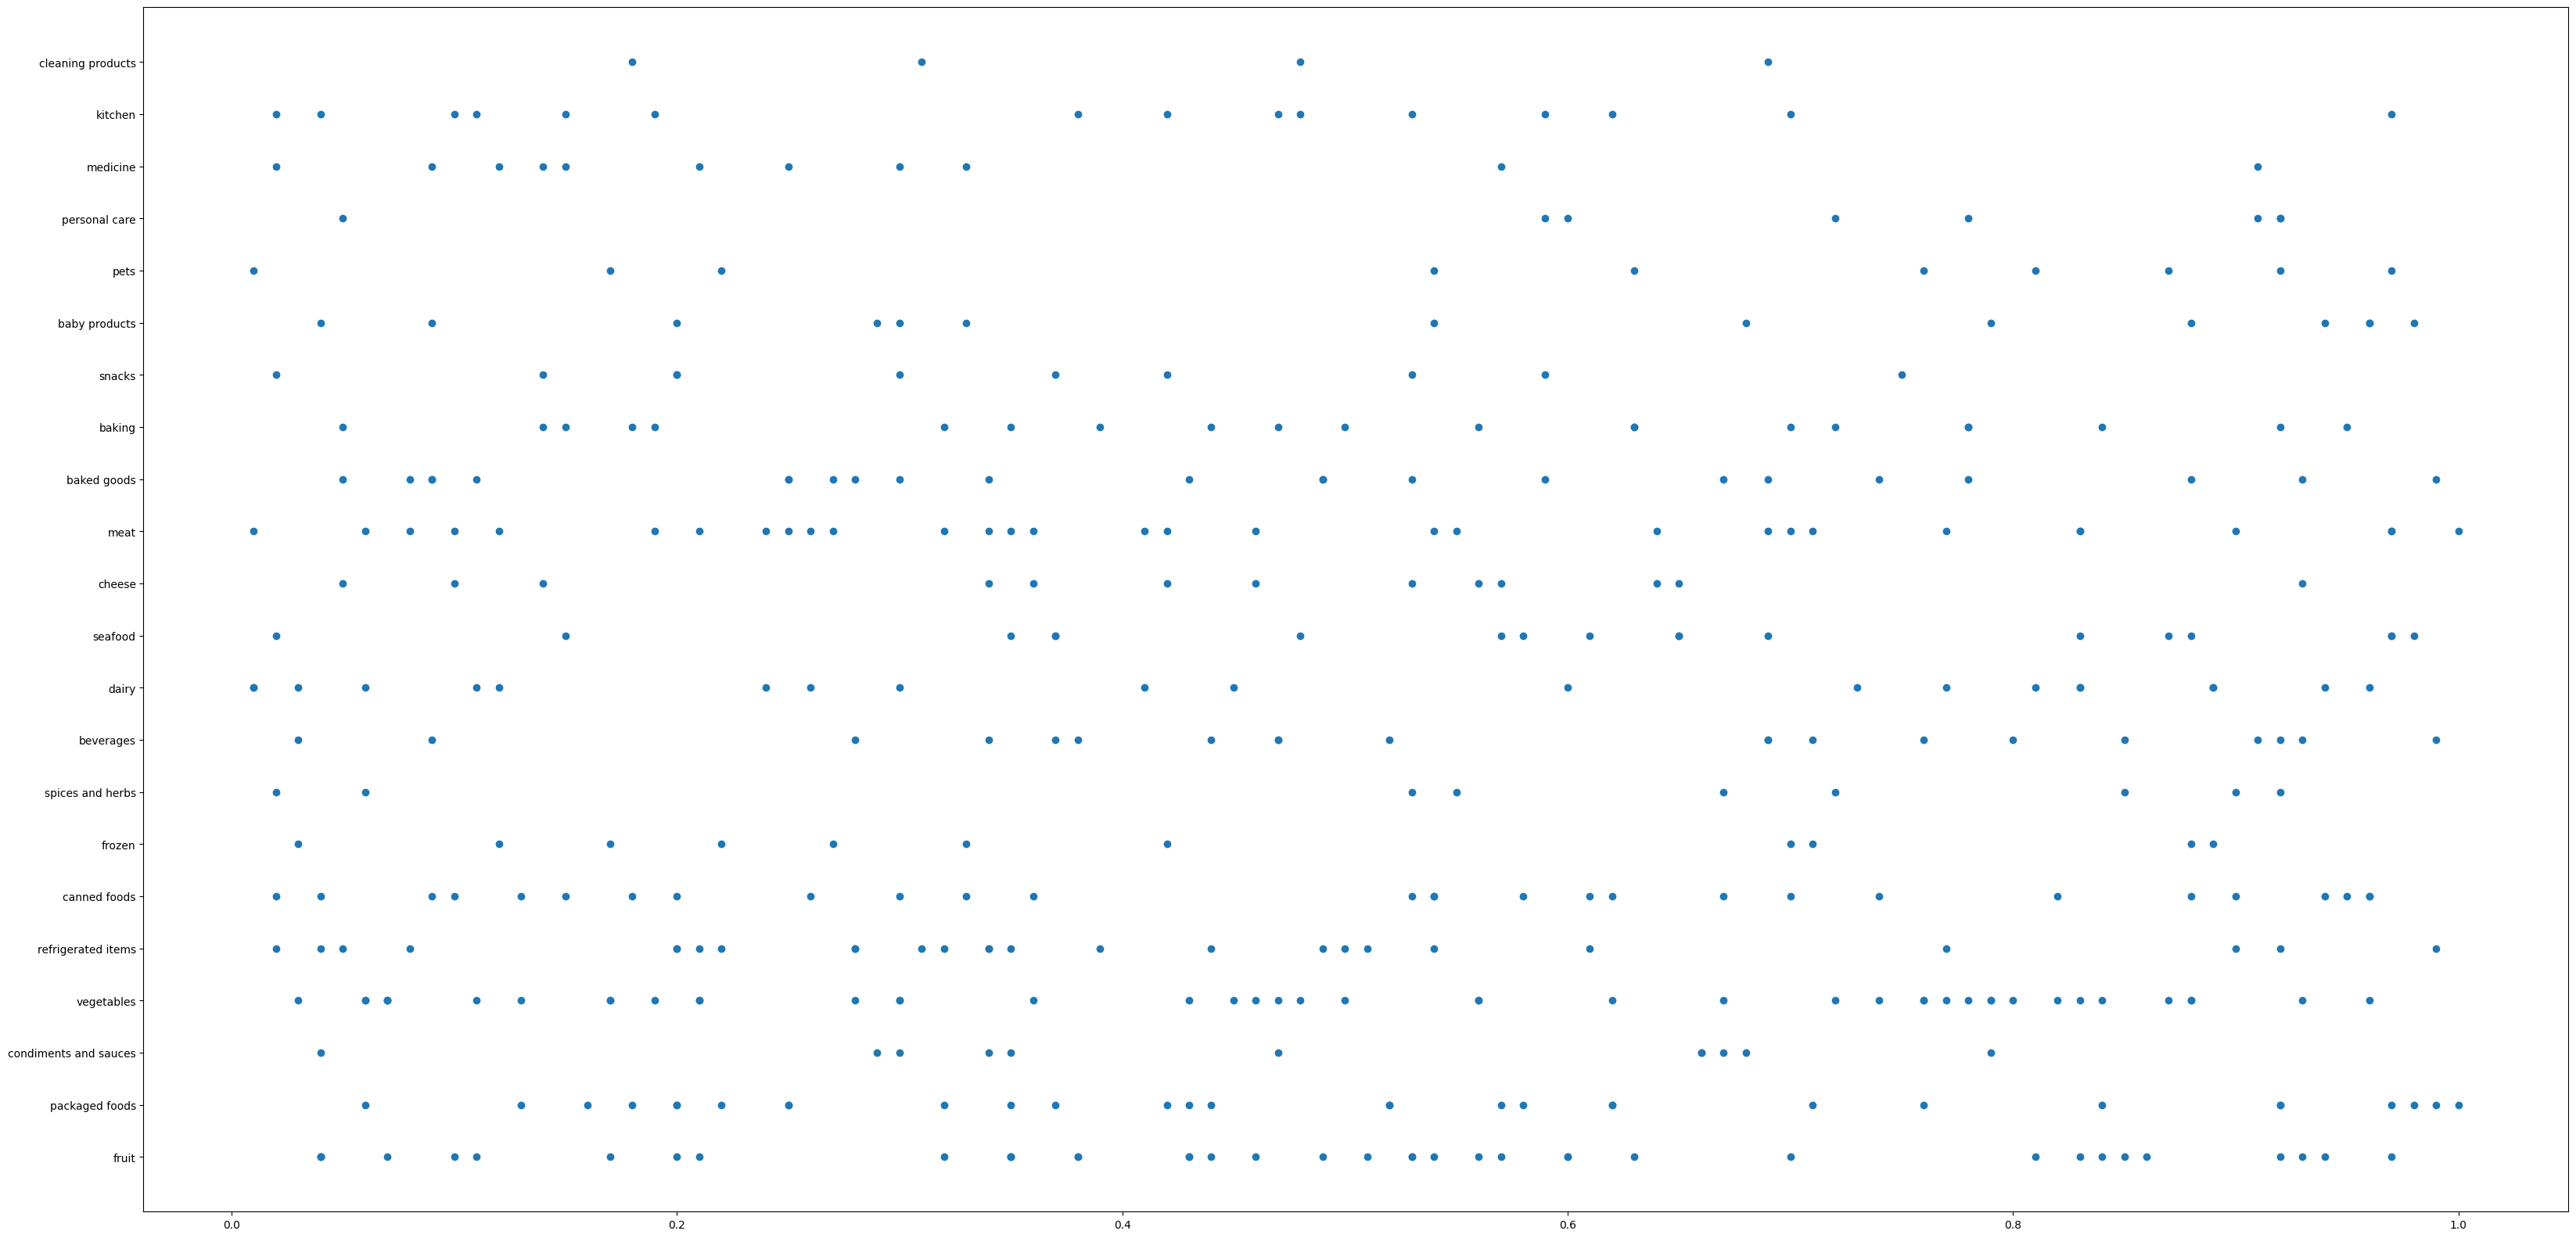

In [314]:
plt.figure(figsize=(40,20))
plt.scatter(stock["estimated_stock_pct"],stock["category"])

plt.show()

In [ ]:
sns.regplot(x= "estimated_stock_pct",y="category", data= stock)

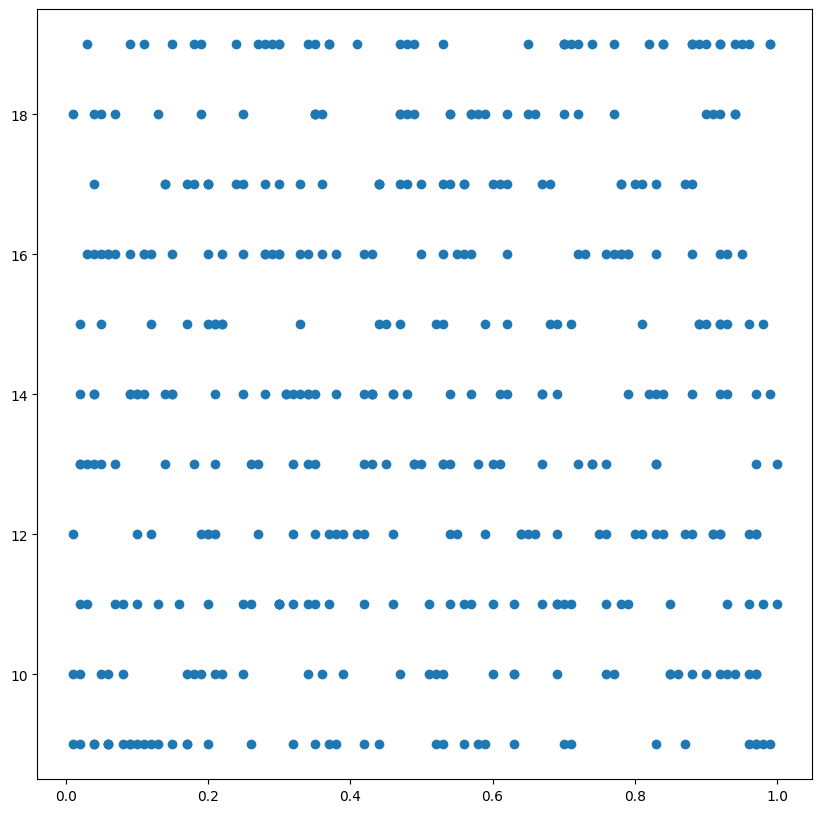

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(stock["estimated_stock_pct"],stock["hour_x"])

plt.show()

<Axes: xlabel='estimated_stock_pct', ylabel='hour_x'>

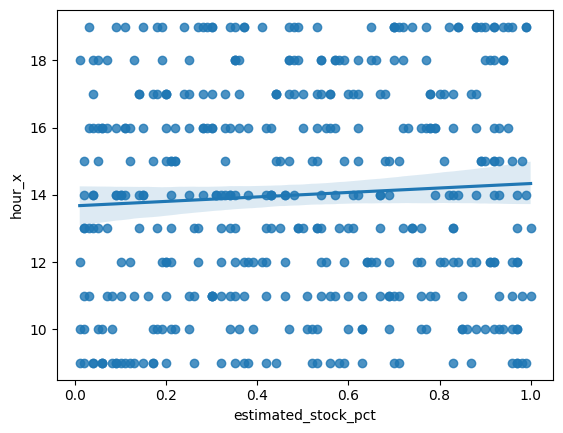

In [ ]:
sns.regplot(x= "estimated_stock_pct", y= "hour_x" , data = stock)

In [ ]:
C= stock["estimated_stock_pct"]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [ ]:
# to complete the first part of the question, I want to create a regression model

A_train, A_test, B_train,B_test= train_test_split(A, B, test_size=0.2)

In [ ]:
for col in A.columns:
	if A[col].dtype == object:
		le = LabelEncoder()
		A[col] = le.fit_transform(A[col])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lin_reg=LinearRegression()
lin_reg.fit(A,B)


LinearRegression()

In [ ]:
lin_reg.fit(A_train,B_train)

LinearRegression()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
lin_reg1=LinearRegression()
lin_reg1


LinearRegression()

In [ ]:
B_train1, B_test1, C_train1,C_test1= train_test_split(B, C, test_size=0.2)

In [ ]:
#lin_reg1.fit(B_train1,C_train1)

In [ ]:
import pandas as pd
import numpy as np

# Check if B_train1 is a Series
if isinstance(B_train1, pd.Series):
    # Convert B_train1 to a NumPy array
    B_train1 = B_train1.to_numpy()

# Reshape B_train1
B_train1 = B_train1.reshape(-1, 1)

# Check if C_train1 is a Series
if isinstance(C_train1, pd.Series):
    # Convert C_train1 to a NumPy array
    C_train1 = C_train1.to_numpy()

# Reshape C_train1
C_train1 = C_train1.reshape(-1, 1)

In [ ]:
B_train1.shape

(333, 1)

In [ ]:
C_train1.shape

(333, 1)

In [ ]:
if B_train1.ndim == 1:
    B_train1 = B_train1.reshape(-1, 1)

if C_train1.ndim == 1:
    C_train1 = C_train1.reshape(-1, 1)

In [ ]:
lin_reg.fit(A_train,B_train)

LinearRegression()

In [ ]:
B_predict=lin_reg.predict(A_test)
B_predict

array([14.09966028, 13.14358948, 13.65718801, 13.56005963, 14.41507993,
       14.42881393, 14.47933918, 14.24117986, 14.60320263, 14.17397573,
       14.72044338, 13.3012993 , 14.43838149, 14.66010625, 13.56987151,
       13.8877474 , 14.47590568, 14.24044692, 13.51591275, 13.70771326,
       13.75726127, 13.79527408, 13.23777299, 14.03245616, 13.8450664 ,
       13.52253544, 14.30789536, 14.35793199, 14.546299  , 14.27134842,
       14.61350313, 13.60371788, 14.32776342, 13.82887615, 14.27723817,
       14.0059654 , 13.97652978, 13.67043339, 14.02337722, 14.0964711 ,
       13.72758133, 13.50929006, 13.46612044, 13.31454468, 14.03613397,
       13.52940244, 14.49920725, 13.37488181, 14.17078654, 14.2880273 ,
       14.29808348, 14.41851343, 13.94195046, 14.02607778, 13.38223743,
       14.32408561, 13.48966631, 13.22403899, 13.84138858, 14.24069123,
       14.11266135, 13.84138858, 14.02607778, 14.2845938 , 14.33781961,
       14.71038719, 14.13742879, 13.18381423, 13.12347711, 13.70

In [ ]:
'''B_predict1=lin_reg1.predict(C_test1)
B_predict1'''

'B_predict1=lin_reg1.predict(C_test1)\nB_predict1'

In [ ]:
mse= mean_squared_error(B_test, B_predict)
mse

10.94260356937425

In [ ]:
'''mse1= mean_squared_error(B_test1, B_predict1)
mse1'''

'mse1= mean_squared_error(B_test1, B_predict1)\nmse1'

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7829 non-null   int64  
 1   transaction_id  7829 non-null   int64  
 2   timestamp       7829 non-null   int64  
 3   product_id      7829 non-null   int64  
 4   category        7829 non-null   int64  
 5   customer_type   7829 non-null   int64  
 6   unit_price      7829 non-null   float64
 7   quantity        7829 non-null   int64  
 8   total           7829 non-null   float64
 9   payment_type    7829 non-null   int64  
 10  date            7829 non-null   int64  
 11  Time            7829 non-null   int64  
 12  hour            7829 non-null   int64  
 13  minute          7829 non-null   int64  
 14  second          7829 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 917.6 KB



Above result shows that:
1. There are no missing values present in our dataset.
2. From the 9 columns, we have only 3 quantitative predictors(including index values), whereas 6 qualitatative predictors.
3. Although we have timestamp provided in object datatype, may be in future we need to convert it into numerical datatype for better processing.

In [ ]:
'''df2.head() '''

'df2.head() '

In [ ]:
'''duplicate_test= df1.drop_duplicates()
# to check for duplicate values '''

'duplicate_test= df1.drop_duplicates()\n# to check for duplicate values '

In [ ]:
'''duplicate_test.info() '''

'duplicate_test.info() '

Result shows that there are no duplicate values while observing all the observations in the provided dataset.


In [317]:
df1["product_id"].nunique()  # to get unique values from the column "product_id"'''

300

In [318]:
set(df1["unit_price"])       # all teh values present in the column"unit_price" '''

{0.19,
 0.49,
 1.19,
 1.49,
 1.99,
 2.19,
 2.49,
 2.99,
 3.19,
 3.49,
 3.99,
 4.19,
 4.49,
 4.99,
 5.19,
 5.49,
 5.99,
 6.19,
 6.49,
 6.99,
 7.19,
 7.49,
 7.99,
 8.19,
 8.49,
 8.99,
 9.19,
 9.49,
 9.99,
 10.19,
 10.49,
 10.99,
 11.19,
 11.49,
 11.99,
 12.19,
 12.49,
 12.99,
 13.19,
 13.49,
 13.99,
 14.19,
 14.49,
 14.99,
 15.19,
 15.49,
 15.99,
 16.19,
 16.49,
 16.99,
 17.19,
 17.99,
 18.19,
 18.49,
 18.99,
 19.19,
 19.49,
 19.99,
 20.19,
 20.49,
 20.99,
 21.99,
 22.19,
 23.99}

In [319]:
df1["quantity"].value_counts()   # values present in the column"quantity" with their frequency or counts '''

1    1979
4    1976
3    1954
2    1920
Name: quantity, dtype: int64

In [320]:
df1["unit_price"].value_counts()  # values present in the column"unit_price" with their frequency or  '''

3.99     374
4.99     374
1.49     321
0.49     306
8.19     272
        ... 
21.99     17
20.99     17
23.99     13
17.99     12
20.19     11
Name: unit_price, Length: 64, dtype: int64

In [321]:
'''df1["price_est"]=round(df1["unit_price"])  # rounding off the values to their nearest integer in "unit_price" column
df1["price_est"].value_counts()            #  frequency/count of values from new dataframe '''

'df1["price_est"]=round(df1["unit_price"])  # rounding off the values to their nearest integer in "unit_price" column\ndf1["price_est"].value_counts()            #  frequency/count of values from new dataframe '

In [322]:
set(df1["product_id"])             #values present inside the column"product_id" '''

{'00e120bb-89d6-4df5-bc48-a051148e3d03',
 '01f3cdd9-8e9e-4dff-9b5c-69698a0388d0',
 '01ff0803-ae73-4234-971d-5713c97b7f4b',
 '02b1a5a2-cd74-4e64-80f0-4667372bc394',
 '0363eb21-8c74-47e1-a216-c37e565e5ceb',
 '03a2557a-aa12-4add-a6d4-77dc36342067',
 '03f0b20e-3b5b-444f-bc39-cdfa2523d4bc',
 '049b2171-0eeb-4a3e-bf98-0c290c7821da',
 '04da844d-8dba-4470-9119-e534d52a03a0',
 '04ec02a4-045f-409e-9161-bb7ccb1d8b05',
 '04f3ad3d-83ab-47e8-925b-3383055489f2',
 '081dd786-e277-4e48-9ffa-b3096d4e9400',
 '088aa3ae-70f3-45af-8d63-15102b71bead',
 '0998699f-2fec-454e-b8b0-4f701947fef6',
 '0b59b73f-8950-4bbf-9125-03f5252a5f19',
 '0c44fa23-9f95-446f-9052-884ae73475d0',
 '0cb046e3-a86b-47ae-9751-3b0f9c596f99',
 '0cc2986e-934c-447e-8f7b-a57b2ceb8693',
 '0ddc2379-adba-4fb0-aa97-19fcafc738a1',
 '0e4c10f4-77bc-4c67-86b2-b4da5ded19bf',
 '0ec3890d-f4be-48a4-9358-291b3da7f578',
 '0f0341de-4b99-43bf-b4bb-f60af2131d68',
 '0f493675-d59d-45dd-9406-084932bf41c1',
 '0f80f0b5-2488-46e1-a8b7-8bb24be25a40',
 '100ab1ec-39f5-

In [323]:
df1[["product_id"]].value_counts()           # frequency/counts of individual "product_id" inside our dataset '''

product_id                          
ecac012c-1dec-41d4-9ebd-56fb7166f6d9    114
80da8348-1707-403f-8be7-9e6deeccc883    109
0ddc2379-adba-4fb0-aa97-19fcafc738a1    108
7c55cbd4-f306-4c04-a030-628cbe7867c1    104
3bc6c1ea-0198-46de-9ffd-514ae3338713    101
                                       ... 
49f7d4a9-713a-4824-b378-aebb33ff8b2f      5
c8de27d0-2c44-4b5a-b178-59c45d054ccb      5
5adfc643-aa8e-4140-b2c3-98a946444632      5
a8fab83a-16d4-4db0-a83a-f824ecd8604a      5
ec0bb9b5-45e3-4de8-963d-e92aa91a201e      3
Length: 300, dtype: int64

**Correlation among variables**

In [324]:
df1.corr()

<ipython-input-324-97d1f8f774ad>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Unnamed: 0,unit_price,quantity,total,hour,minute,second
Unnamed: 0,1.000000,0.623392,0.003927,0.483878,0.001565,-0.002061,-0.012421
unit_price,0.623392,1.000000,0.024588,0.792018,0.010842,0.006732,-0.002426
quantity,0.003927,0.024588,1.000000,0.521926,-0.008410,0.007211,-0.018625
total,0.483878,0.792018,0.521926,1.000000,0.010354,0.000066,-0.015471
hour,0.001565,0.010842,-0.008410,0.010354,1.000000,-0.022442,-0.011185
minute,-0.002061,0.006732,0.007211,0.000066,-0.022442,1.000000,-0.009954
second,-0.012421,-0.002426,-0.018625,-0.015471,-0.011185,-0.009954,1.000000


In [325]:
df2.corr()

<ipython-input-325-25bdc8fe1b96>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,Unnamed: 0,temperature,hour,minute,second
Unnamed: 0,1.000000,-0.009478,-0.005990,0.001285,0.001942
temperature,-0.009478,1.000000,0.002767,-0.000218,0.003078
hour,-0.005990,0.002767,1.000000,-0.007841,0.008632
minute,0.001285,-0.000218,-0.007841,1.000000,-0.004433
second,0.001942,0.003078,0.008632,-0.004433,1.000000


In [327]:
df1_stock.corr()

<ipython-input-327-113906eff516>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1_stock.corr()


,Unnamed: 0,estimated_stock_pct,hour,minute,second
Unnamed: 0,1.000000,0.002622,-0.000215,-0.001398,0.005700
estimated_stock_pct,0.002622,1.000000,0.008012,0.004795,-0.003492
hour,-0.000215,0.008012,1.000000,0.013576,-0.005477
minute,-0.001398,0.004795,0.013576,1.000000,-0.002162
second,0.005700,-0.003492,-0.005477,-0.002162,1.000000


In [328]:
stock.corr()

<ipython-input-328-5be9657b3f16>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  stock.corr()


,Unnamed: 0_x,unit_price,quantity,total,hour_x,minute_x,second_x,Unnamed: 0_y,estimated_stock_pct,hour_y,minute_y,second_y
Unnamed: 0_x,1.000000,0.579891,0.027507,0.463169,0.083537,-0.040253,-0.035928,-0.047144,-0.010966,0.083537,-0.040253,-0.035928
unit_price,0.579891,1.000000,-0.030050,0.749420,0.056923,0.008783,0.069666,-0.055090,0.031487,0.056923,0.008783,0.069666
quantity,0.027507,-0.030050,1.000000,0.522547,-0.012836,-0.013909,0.007121,0.040333,-0.015384,-0.012836,-0.013909,0.007121
total,0.463169,0.749420,0.522547,1.000000,0.033792,-0.033737,0.038580,-0.003850,0.008455,0.033792,-0.033737,0.038580
hour_x,0.083537,0.056923,-0.012836,0.033792,1.000000,-0.018005,0.021347,0.024070,0.061855,1.000000,-0.018005,0.021347
minute_x,-0.040253,0.008783,-0.013909,-0.033737,-0.018005,1.000000,-0.064909,0.006638,0.007898,-0.018005,1.000000,-0.064909
second_x,-0.035928,0.069666,0.007121,0.038580,0.021347,-0.064909,1.000000,-0.062327,-0.021734,0.021347,-0.064909,1.000000
Unnamed: 0_y,-0.047144,-0.055090,0.040333,-0.003850,0.024070,0.006638,-0.062327,1.000000,0.063948,0.024070,0.006638,-0.062327
estimated_stock_pct,-0.010966,0.031487,-0.015384,0.008455,0.061855,0.007898,-0.021734,0.063948,1.000000,0.061855,0.007898,-0.021734
hour_y,0.083537,0.056923,-0.012836,0.033792,1.000000,-0.018005,0.021347,0.024070,0.061855,1.000000,-0.018005,0.021347


In [329]:
stock

,Unnamed: 0_x,transaction_id,timestamp,product_id_x,category,customer_type,unit_price,quantity,total,payment_type,...,second_x,Unnamed: 0_y,id,product_id_y,estimated_stock_pct,date_y,Time_y,hour_y,minute_y,second_y
0,13,05bd411c-b512-49a3-b61e-070ebbb33597,2022-03-04 14:41:58,35e00193-aa27-4121-87f4-6ac0d8a8671f,fruit,premium,0.49,4,1.96,e-wallet,...,58,3154,9c4a3ab5-d413-44be-854f-aa4bc25f3b76,32a2ea10-8010-4046-bf34-2117692ebd4a,0.43,2022-03-04,1900-01-01 14:41:58,14,41,58
1,56,111dceae-b855-4e63-906a-fe6d4fe07db0,2022-03-07 13:12:50,80da8348-1707-403f-8be7-9e6deeccc883,fruit,basic,0.19,1,0.19,credit card,...,50,14882,f12ee016-da32-469e-bd7e-692320bd1d58,be657df2-49cd-44fb-852e-7204b6c2c5ba,0.49,2022-03-07,1900-01-01 13:12:50,13,12,50
2,121,d3fce777-61b1-4426-9b64-0383d8e2e0b4,2022-03-07 14:48:10,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,3,0.57,credit card,...,10,12612,445e19c4-3104-4bab-b525-5289fa5cce53,7e33937d-7b4d-426c-a72f-382485b6df26,0.46,2022-03-07,1900-01-01 14:48:10,14,48,10
3,123,ba2b8370-9980-49cd-be8d-a2a974f05a96,2022-03-02 09:16:01,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,premium,4.49,2,8.98,credit card,...,1,9472,90aadf45-5b00-421e-b4c4-7c3b17ecadc9,54b479bb-7e7a-4e63-8bef-1a1e17fefd1f,0.04,2022-03-02,1900-01-01 09:16:01,9,16,1
4,144,6e1eeda2-3b2b-471a-a657-2991a66c0b29,2022-03-05 19:31:55,ecac012c-1dec-41d4-9ebd-56fb7166f6d9,fruit,non-member,4.99,1,4.99,cash,...,55,8323,01aceb5c-2c74-4230-bc34-b47c0e8a9a4d,a1958c40-eafa-47e8-8973-f561d284c97a,0.92,2022-03-05,1900-01-01 19:31:55,19,31,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,7500,d985a5f2-b1aa-46ab-b490-cff17806f299,2022-03-06 14:56:11,8d4e9112-8a1c-4263-b493-9731d04facd6,kitchen,basic,10.19,3,30.57,cash,...,11,4829,f89b50e2-d831-4002-b384-deda27c69efe,6f90377e-bf10-44bb-8b76-d4b3a520f31e,0.48,2022-03-06,1900-01-01 14:56:11,14,56,11
413,7600,fc7b66e1-86cc-4c16-9938-4071791a257e,2022-03-07 19:34:02,b5c56c3f-b5c0-42b4-afb2-54fdd1dd488a,cleaning products,gold,11.99,1,11.99,e-wallet,...,2,10759,2579642c-daf4-453f-84d9-711f17388aeb,39d8c44f-8da7-41f6-89dd-6f928ecd0a2c,0.48,2022-03-07,1900-01-01 19:34:02,19,34,2
414,7658,b7a18b86-0744-48ee-af09-ab13ad8d86c1,2022-03-03 11:17:10,6c8d0a2a-576a-432f-a090-c123dee91aaa,cleaning products,basic,15.49,4,61.96,credit card,...,10,5660,cf62d1a8-7dec-4e91-8711-da0407702435,c9efdd15-3719-474a-8460-e1b77912c4a2,0.69,2022-03-03,1900-01-01 11:17:10,11,17,10
415,7696,58e568ee-92d5-4c12-8703-9ce855445e7b,2022-03-04 14:45:56,34b5e479-bbf6-46ce-9af8-5425f4bca83e,cleaning products,premium,17.19,1,17.19,debit card,...,56,7199,fde4678c-26a3-4513-b79d-85750655859c,84963528-84f2-4aac-a575-b7da573cf04f,0.31,2022-03-04,1900-01-01 14:45:56,14,45,56


In [330]:
stock.dtypes

Unnamed: 0_x                    int64
transaction_id                 object
timestamp                      object
product_id_x                   object
category                       object
customer_type                  object
unit_price                    float64
quantity                        int64
total                         float64
payment_type                   object
date_x                         object
Time_x                 datetime64[ns]
hour_x                          int64
minute_x                        int64
second_x                        int64
Unnamed: 0_y                    int64
id                             object
product_id_y                   object
estimated_stock_pct           float64
date_y                         object
Time_y                 datetime64[ns]
hour_y                          int64
minute_y                        int64
second_y                        int64
dtype: object

**Next part: DATA VISUALIZATION AND MODELING**

In [ ]:
#bins=np.linspace(min(df1["price_est"]),max(df1["price_est"],5))
#label_s= ["low","mid","high"]
#df1["price_div"]=pd.cut(df1["price_est"],bins,labels=label_s,include_lowest=True)

# tried to categorize "unit_price" column , but unable to perform the right operations here. :(

# SOLVING QUESTION 1 FROM HERE:

In [ ]:
#TO SOLVE THE FIRST QUESTION I NEED TO USE "stock" FOR REGRESSION PURPOSE ON "estimated_stock_pct" COLUMN.
# I will use regression techniques here

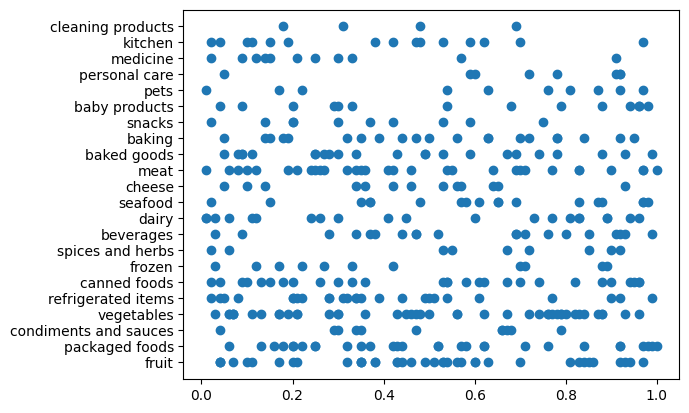

In [ ]:
plt.scatter(stock[["estimated_stock_pct"]],stock["category"])

In [ ]:
# scenario in retailer shop
stock[["category","estimated_stock_pct","hour_x"]].value_counts().head(20)

category            estimated_stock_pct  hour_x
seafood             0.97                 10        2
refrigerated items  0.20                 17        2
dairy               0.89                 15        2
baby products       0.04                 16        1
packaged foods      0.62                 16        1
                                         14        1
                    0.58                 9         1
                    0.57                 18        1
                    0.52                 10        1
                                         9         1
                    0.44                 9         1
                    0.43                 14        1
                    0.42                 12        1
                    0.37                 9         1
                    0.35                 13        1
                    0.76                 13        1
                    0.32                 14        1
                    0.25                 18        

# **SOLVING QUESTION 2 FROM HERE**

In [ ]:
df1

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,date,Time,hour,minute,second
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,2022-03-02,1900-01-01 09:51:38,9,51,38
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,2022-03-06,1900-01-01 10:33:59,10,33,59
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,2022-03-04,1900-01-01 17:20:21,17,20,21
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,2022-03-02,1900-01-01 17:23:58,17,23,58
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,2022-03-05,1900-01-01 14:32:43,14,32,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7824,7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet,2022-03-03,1900-01-01 18:22:09,18,22,9
7825,7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card,2022-03-04,1900-01-01 19:14:46,19,14,46
7826,7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card,2022-03-03,1900-01-01 14:00:09,14,0,9
7827,7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash,2022-03-04,1900-01-01 15:11:38,15,11,38


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

In [ ]:
for col in df1.columns:
	if df1[col].dtype == object:
		le = LabelEncoder()
		df1[col] = le.fit_transform(df1[col])




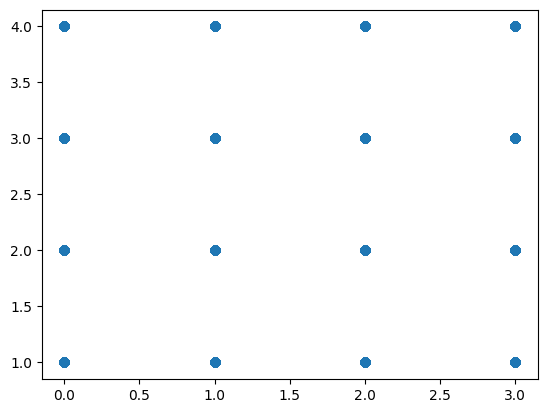

In [ ]:
plt.scatter(df1["payment_type"], df1["quantity"])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df1[["product_id","customer_type","total","payment_type"]]

In [ ]:
x

,product_id,customer_type,total,payment_type
0,90,1,7.98,3
1,225,4,3.99,3
2,163,3,0.38,3
3,172,1,0.76,3
4,169,0,8.98,2
...,...,...,...,...
7824,240,0,28.38,3
7825,149,4,16.99,1
7826,221,0,28.38,1
7827,149,0,67.96,0


In [ ]:
y=df1[["category"]]

In [ ]:
X_train,X_test, y_train, y_test = train_test_split( x , y, test_size=0.2)

In [ ]:
X_train

,product_id,customer_type,total,payment_type
49,30,1,4.47,0
1253,1,3,2.98,1
2054,234,1,8.99,2
7296,131,0,34.38,2
6311,254,2,13.47,3
...,...,...,...,...
7478,86,3,15.49,0
4852,251,3,48.76,3
589,90,1,11.97,1
3177,40,0,12.38,2


In [ ]:
X_test

,product_id,customer_type,total,payment_type
3244,95,2,7.19,3
6018,49,0,24.57,0
5363,235,2,72.76,3
4346,148,1,7.19,3
2581,238,3,1.96,3
...,...,...,...,...
2314,270,1,33.57,0
3395,286,4,2.99,1
1876,11,2,43.96,3
899,8,0,1.96,2


In [ ]:
y_train

,category
49,10
1253,21
2054,17
7296,11
6311,19
...,...
7478,11
4852,12
589,10
3177,14


In [ ]:
y_test

,category
3244,14
6018,2
5363,18
4346,8
2581,20
...,...
2314,9
3395,14
1876,17
899,10


**Question 1: By Implementation of Logistic Regression**

In [331]:
from sklearn.linear_model import LogisticRegression

In [332]:
from sklearn import linear_model
m1= linear_model.LogisticRegression()
m1.fit(A_train,B_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
#df1=pd.to_merge(df1,df1_rev1)
B_predict_= m1.predict(A_test)
B_predict_



array([12,  9,  9, 14, 19, 19, 19, 14, 19, 14, 19,  9, 19, 19,  9, 10, 19,
       12,  9, 14, 10, 14,  9, 12, 14,  9, 19, 19, 19, 14, 19, 14, 19, 14,
       12, 14, 14,  9, 14, 12,  9,  9,  9,  9, 14,  9, 19, 10, 14, 14, 14,
       19, 12, 14,  9, 12,  9,  9,  9, 19, 12,  9, 14, 14, 19, 19, 14,  9,
        9, 14,  9,  9, 12, 19, 19, 14,  9, 14,  9, 14, 14, 19,  9, 19])

In [ ]:
A_test

,estimated_stock_pct,category
257,0.69,12
76,0.13,21
269,0.25,12
408,0.11,11
223,0.83,8
...,...,...
237,0.01,8
406,0.42,11
231,0.60,8
66,0.30,21


In [ ]:
print(mean_squared_error(B_test, B_predict_))

26.142857142857142


In [ ]:
# confusion matrix to understand where the m1 doesnot behave well.
p1= m1.predict(A_test)
p1

array([12,  9,  9, 14, 19, 19, 19, 14, 19, 14, 19,  9, 19, 19,  9, 10, 19,
       12,  9, 14, 10, 14,  9, 12, 14,  9, 19, 19, 19, 14, 19, 14, 19, 14,
       12, 14, 14,  9, 14, 12,  9,  9,  9,  9, 14,  9, 19, 10, 14, 14, 14,
       19, 12, 14,  9, 12,  9,  9,  9, 19, 12,  9, 14, 14, 19, 19, 14,  9,
        9, 14,  9,  9, 12, 19, 19, 14,  9, 14,  9, 14, 14, 19,  9, 19])

In [ ]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(B_test,p1)
cm

array([[3, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0],
       [2, 1, 0, 0, 0, 3, 0, 0, 0, 0, 5],
       [4, 0, 0, 2, 0, 4, 0, 0, 0, 0, 1],
       [1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2],
       [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 4],
       [2, 0, 0, 1, 0, 2, 0, 0, 0, 0, 2],
       [3, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2],
       [3, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2],
       [2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0],
       [3, 0, 0, 0, 0, 4, 0, 0, 0, 0, 3]])

In [ ]:
model= LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

y_test

In [ ]:
model.score(X_test,y_test)

0.19540229885057472

In [333]:
df1["Time"]= pd.to_numeric(df1["Time"])

In [334]:
df1["unit_price"]= pd.to_numeric(df1["unit_price"])

In [335]:
df1["total"]= pd.to_numeric(df1["total"])

In [ ]:
df1.head()

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,date,Time,hour,minute,second
0,0,4934,1231,90,10,1,3.99,2,7.98,3,1,-2208953302000000000,9,51,38
1,1,4489,5708,225,10,4,3.99,1,3.99,3,5,-2208950761000000000,10,33,59
2,2,5308,4209,163,10,3,0.19,2,0.38,3,3,-2208926379000000000,17,20,21
3,3,668,2025,172,10,1,0.19,4,0.76,3,1,-2208926162000000000,17,23,58
4,4,5124,4987,169,10,0,4.49,2,8.98,2,4,-2208936437000000000,14,32,43


In [ ]:
scaler = StandardScaler()
data = scaler.fit_transform(df1)


In [ ]:
stock.dtypes

Unnamed: 0_x                    int64
transaction_id                 object
timestamp                      object
product_id_x                   object
category                       object
customer_type                  object
unit_price                    float64
quantity                        int64
total                         float64
payment_type                   object
date_x                         object
Time_x                 datetime64[ns]
hour_x                          int64
minute_x                        int64
second_x                        int64
Unnamed: 0_y                    int64
id                             object
product_id_y                   object
estimated_stock_pct           float64
date_y                         object
Time_y                 datetime64[ns]
hour_y                          int64
minute_y                        int64
second_y                        int64
dtype: object

In [ ]:
#stock= stock.drop(["Unnamed: 0_x","Unnamed: 0_y"],axis= 1)

In [ ]:
X1=df1[["product_id","customer_type","total","payment_type","category"]]

In [ ]:
X2= df1[["total","category"]]

In [ ]:
#Implementation of random forest
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(A_train,B_train)

RandomForestClassifier()

In [ ]:
A.dtypes

estimated_stock_pct    float64
category                 int64
dtype: object

In [ ]:
'''A = pd.to_numeric(A.values)
B = pd.to_numeric(B)'''
B_pred_rf= print(rf.predict(A_test))    # prediction for hours
B_pred_rf

[19 10  9 11 16 18 13 19 11 14  9 16 19 17 14 10  9 12 12 16 18 15  9 19
 18 11 17 11 13 19 16  9 12 13 18 13  9  9 18 13 13 14 10 16 16 10 18 14
 12 14 14 17 14 16 10 14 14 14 18  9 19 18 16 17 11 18 16 10 16 14 15  9
 16 15 15 16 12 11 17 12 14 13 16 19]


In [ ]:
from sklearn.metrics import roc_curve, auc
false_positive_rate,true_positive_rate,thresholds = roc_curve(B_test, B_pred_rf) #fpr-false positive rate, # tpr- true positive rate
roc_auc= auc(false_positive_rate, true_positive_rate)
roc_auc


**Summary for question 1:**

**overall, random forest works better than other techniques mentioned. it can be used for prediction in our case. Hence, one can use Random forest, Decision trees and any other ensemble learning techniques for better prediction with the provided dataset.**

**FOR QUESTION 2**

In [ ]:
from sklearn.cluster import KMeans
wcss=[]   # sum of squares of each point with its nearest centroid

In [ ]:
for i in range(1,16):
  kmeans=KMeans(n_clusters=i, init="k-means++" , random_state=0)
  kmeans.fit(X1)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
"""for i in range(1,6):
  kmeans1=KMeans(n_clusters=i, init="k-means++" , random_state=0)
  kmeans1.fit(X2)
  wcss.append(kmeans1.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

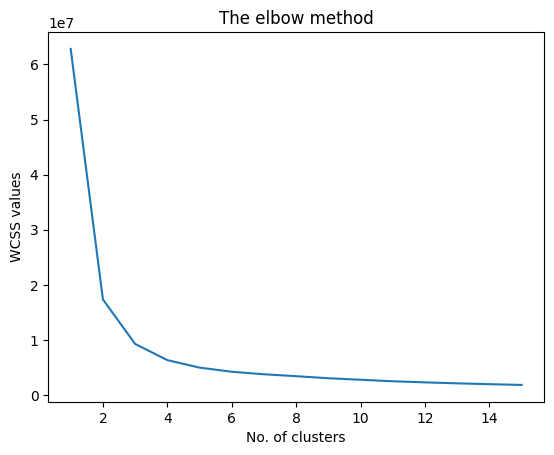

In [ ]:
plt.plot(range(1,16), wcss)
plt.title("The elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS values")
plt.show()

In [ ]:
'''plt.plot(range(1,6), wcss)
plt.title("The elbow method")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS values")
plt.show() '''

'plt.plot(range(1,6), wcss)\nplt.title("The elbow method")\nplt.xlabel("No. of clusters")\nplt.ylabel("WCSS values")\nplt.show() '

we can see from above plot that the optimal number of clusters= 3 in our case

In [ ]:
kmeansmodel= KMeans(n_clusters=3, init="k-means++", random_state= 0)

**TRAINING OUR DATASET USING K_MEANS CLUSTERING ALGORITHM**

In [ ]:
#kmeansmodel1= KMeans(n_clusters=3, init="k-means++", random_state= 0)

In [ ]:
y_kmeans= kmeansmodel.fit_predict(X1)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
#y_kmeans1= kmeansmodel1.fit_predict(X2)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


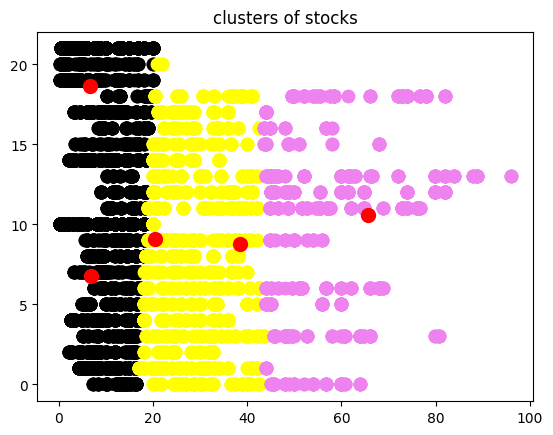

In [ ]:
plt.scatter(X2.iloc[y_kmeans1 == 0,0], X2.iloc[y_kmeans1==0,1],s=80, c="black", label="stock1")
plt.scatter(X2.iloc[y_kmeans1 == 1,0],X2.iloc[y_kmeans1==1,1], s=80, c="yellow", label="stock2")
plt.scatter(X2.iloc[y_kmeans1 == 2,0], X2.iloc[y_kmeans1==2,1], s=80, c="violet", label="stock3")
plt.scatter(kmeans1.cluster_centers_[:,0], kmeans1.cluster_centers_[:,1], s=100, c="red", label="centroids")
plt.title("clusters of stocks")
plt.show()
# plotting centroid of clusters


In [ ]:
'''plt.scatter(X1.iloc[y_kmeans == 0,0], X1.iloc[y_kmeans==0,1],s=80, c="black", label="stock1")
plt.scatter(X1.iloc[y_kmeans == 1,0],X1.iloc[y_kmeans==1,1], s=80, c="yellow", label="stock2")
plt.scatter(X1.iloc[y_kmeans == 2,0], X1.iloc[y_kmeans==2,1], s=80, c="violet", label="stock3")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="red", label="centroids")
plt.title("clusters of stocks")
plt.show()
# plotting centroid of clusters
'''


'plt.scatter(X1.iloc[y_kmeans == 0,0], X1.iloc[y_kmeans==0,1],s=80, c="black", label="stock1")\nplt.scatter(X1.iloc[y_kmeans == 1,0],X1.iloc[y_kmeans==1,1], s=80, c="yellow", label="stock2")\nplt.scatter(X1.iloc[y_kmeans == 2,0], X1.iloc[y_kmeans==2,1], s=80, c="violet", label="stock3")\nplt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c="red", label="centroids")\nplt.title("clusters of stocks")\nplt.show()\n# plotting centroid of clusters\n'

<BarContainer object of 7829 artists>

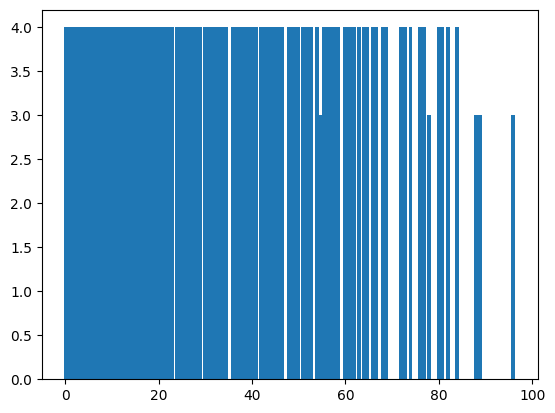

In [ ]:
plt.bar(df1["total"],df1["customer_type"])

<Axes: >

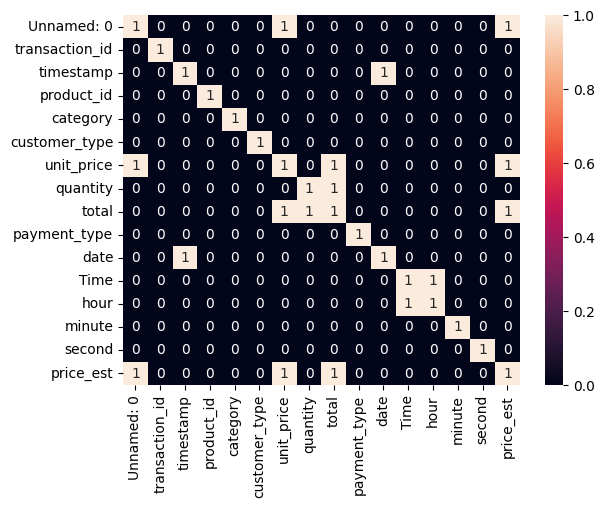

In [ ]:
sns.heatmap(df1.corr()>0.5, annot=True)

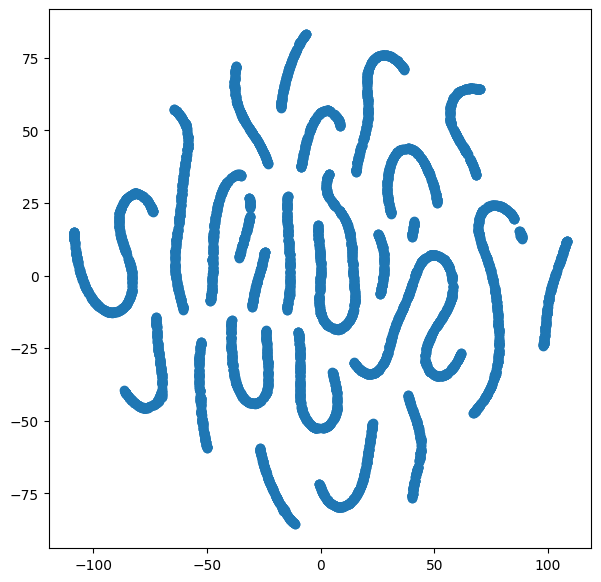

In [ ]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0)
tsne_data = model.fit(df1)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data.embedding_[:, 0], tsne_data.embedding_[:, 1])
plt.show()



In [ ]:
from sklearn.manifold import TSNE
model1 = TSNE(n_components=2, random_state=0)
tsne_data = model1.fit(stock)
plt.figure(figsize=(7, 7))
plt.scatter(tsne_data.embedding_[:, 0], tsne_data.embedding_[:, 1])
plt.show()

In [ ]:
error = []
for n_clusters in range(1, 21):
	model = KMeans(init='k-means++',
				n_clusters=n_clusters,
				max_iter=500,
				random_state=22)
	model.fit(df1)
	error.append(model.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

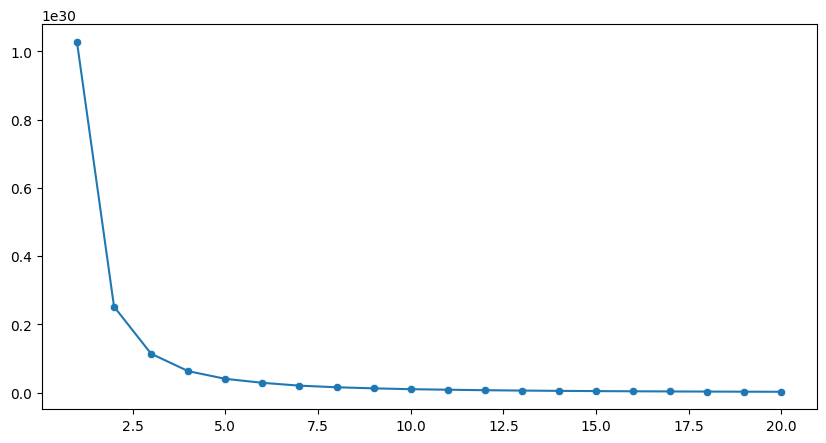

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 21), y=error)
sns.scatterplot(x=range(1, 21), y=error)
plt.show()


In [ ]:
# create clustering model with optimal k=5
model = KMeans(init='k-means++',
			n_clusters=3,
			max_iter=500,
			random_state=22)
segments = model.fit_predict(df1)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


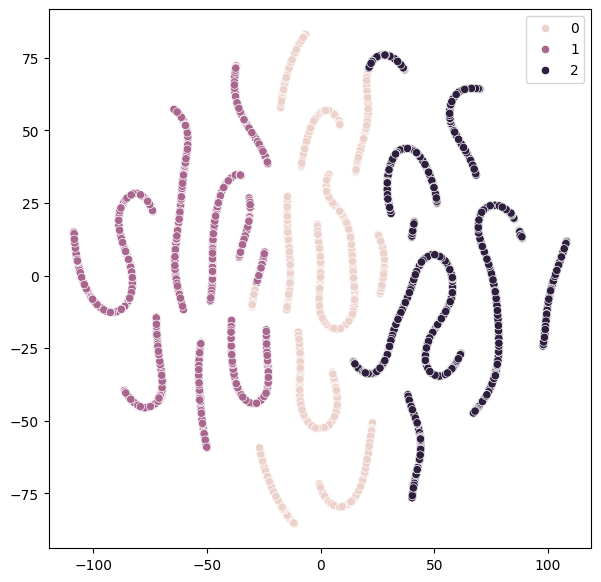

In [ ]:
plt.figure(figsize=(7, 7))
sns.scatterplot(x=tsne_data.embedding_[:, 0], y= tsne_data.embedding_[:, 1], hue=segments)
plt.show()


In [ ]:
X= df1.drop(["payment_type"],axis=1)     # creating new dataframe X with all the independent variables from our dataset.
Y= df1["payment_type"]                   # creating another dataframe Y with only dependent variable from our dataset.

In [ ]:
X.head()               # first five rows of all the independent variables

,Unnamed: 0,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,date,Time,hour,minute,second
0,0,4934,1231,90,10,1,3.99,2,7.98,1,-2208953302000000000,9,51,38
1,1,4489,5708,225,10,4,3.99,1,3.99,5,-2208950761000000000,10,33,59
2,2,5308,4209,163,10,3,0.19,2,0.38,3,-2208926379000000000,17,20,21
3,3,668,2025,172,10,1,0.19,4,0.76,1,-2208926162000000000,17,23,58
4,4,5124,4987,169,10,0,4.49,2,8.98,4,-2208936437000000000,14,32,43


In [ ]:
Y.head()                           # first five rows from the dependent variable

0      e-wallet
1      e-wallet
2      e-wallet
3      e-wallet
4    debit card
Name: payment_type, dtype: object

In [ ]:
set(df1["customer_type"])

{'basic', 'gold', 'non-member', 'premium', 'standard'}

In [ ]:
set(df1["payment_type"])

{'cash', 'credit card', 'debit card', 'e-wallet'}

In [ ]:
# Analysing correlation among the predictors for better understanding of relationship between them.
df1.corr()

<ipython-input-22-ff1dffa1d815>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Unnamed: 0,unit_price,quantity,total,price_est
Unnamed: 0,1.000000,0.623392,0.003927,0.483878,0.621725
unit_price,0.623392,1.000000,0.024588,0.792018,0.999236
quantity,0.003927,0.024588,1.000000,0.521926,0.024779
total,0.483878,0.792018,0.521926,1.000000,0.791663
price_est,0.621725,0.999236,0.024779,0.791663,1.000000


from matplotlib import pyplot as plt
_df_0['Unnamed: 0'].plot(kind='hist', bins=20, title='Unnamed: 0')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['unit_price'].plot(kind='hist', bins=20, title='unit_price')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['quantity'].plot(kind='hist', bins=20, title='quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['total'].plot(kind='hist', bins=20, title='total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Unnamed: 0', y='unit_price', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='unit_price', y='quantity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='quantity', y='total', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='total', y='price_est', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Unnamed: 0'].plot(kind='line', figsize=(8, 4), title='Unnamed: 0')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['unit_price'].plot(kind='line', figsize=(8, 4), title='unit_price')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['quantity'].plot(kind='line', figsize=(8, 4), title='quantity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['total'].plot(kind='line', figsize=(8, 4), title='total')
plt.gca().spines[['top', 'right']].set_visible(False)

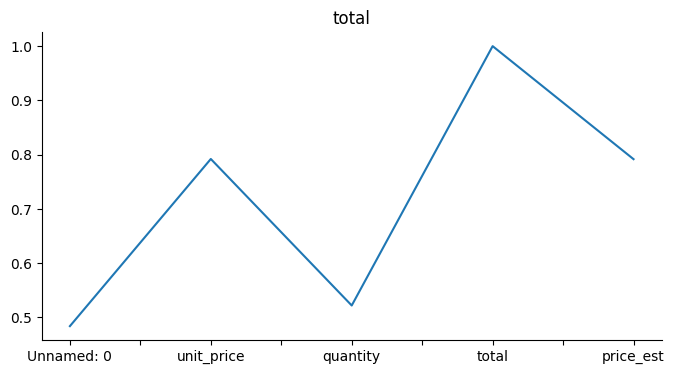

In [ ]:
# To analyze above correlation in a pictorial way
_df_11['total'].plot(kind='line', figsize=(8, 4), title='total')
plt.gca().spines[['top', 'right']].set_visible(False)

shows that "total" column is positively correlated with the "unit_price" column almost 80%

<Axes: xlabel='customer_type', ylabel='Unnamed: 0'>

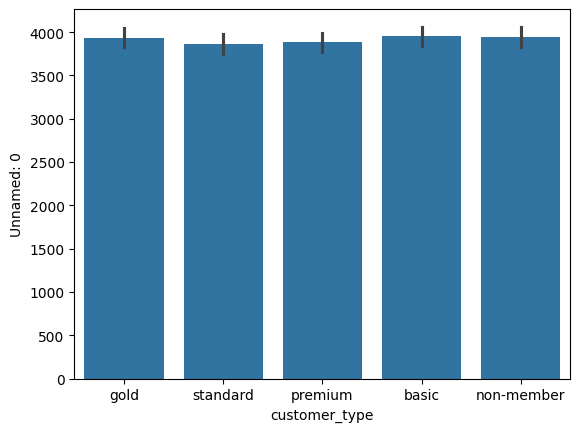

In [ ]:
#from matplotlib import pyplot as plt
#plt.bar(df1[["payment_type"]],df1[["category"]])

# Frequency/count of customer_type in our dataset in a graphical way
sns.barplot(y="Unnamed: 0",x="customer_type",data=df1) # "Unnamed: 0" column can be treated here as column

In [ ]:
df1['customer_type'].value_counts()

non-member    1601
standard      1595
premium       1590
basic         1526
gold          1517
Name: customer_type, dtype: int64

shows that most purchasing customers are non-members of the company following standard, premium and basic customers in decreasing order.Lastly, the lowest purchase comes from the gold customers in the company.

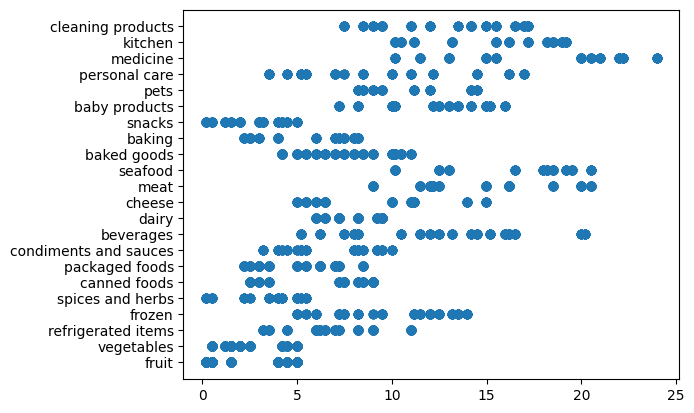

In [ ]:
# relationship between "unit_price" and "category" columns
x=df1["unit_price"]
y=df1["category"]
plt.scatter(x,y)


**Result:**

Keeping all other predictors fixed, most of the sales come from medicine, following by seafood, meat and beverages

<BarContainer object of 7829 artists>

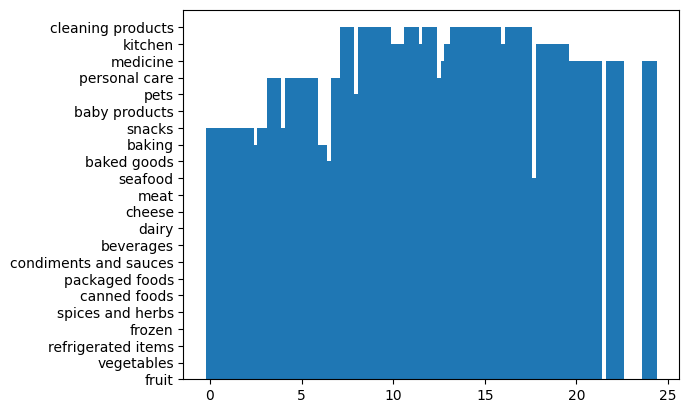

In [ ]:
%matplotlib inline
plt.bar(x,y)    #above relationship in a bar plot(not so intuitive)

In [ ]:
#To see all the values inside the column"category"
set(df1["category"])

{'baby products',
 'baked goods',
 'baking',
 'beverages',
 'canned foods',
 'cheese',
 'cleaning products',
 'condiments and sauces',
 'dairy',
 'frozen',
 'fruit',
 'kitchen',
 'meat',
 'medicine',
 'packaged foods',
 'personal care',
 'pets',
 'refrigerated items',
 'seafood',
 'snacks',
 'spices and herbs',
 'vegetables'}

In [ ]:
# comparison between different predictors
df1_comp= df1[["category","customer_type","total"]]
df1_order= df1_comp.groupby(["category","customer_type"],as_index=False).mean()
df1_order


,category,customer_type,total
0,baby products,basic,31.543265
1,baby products,gold,28.481087
2,baby products,non-member,28.741778
3,baby products,premium,33.771282
4,baby products,standard,27.528000
...,...,...,...
105,vegetables,basic,5.641563
106,vegetables,gold,6.609023
107,vegetables,non-member,5.836723
108,vegetables,premium,5.681868


from matplotlib import pyplot as plt
df1_order['total'].plot(kind='hist', bins=20, title='total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df1_order.groupby('customer_type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df1_order['total'].plot(kind='line', figsize=(8, 4), title='total')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df1_order['customer_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df1_order, x='total', y='customer_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-87-9f3c223fed37>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(df1_order, x='total', y='customer_type', inner='stick', palette='Dark2')


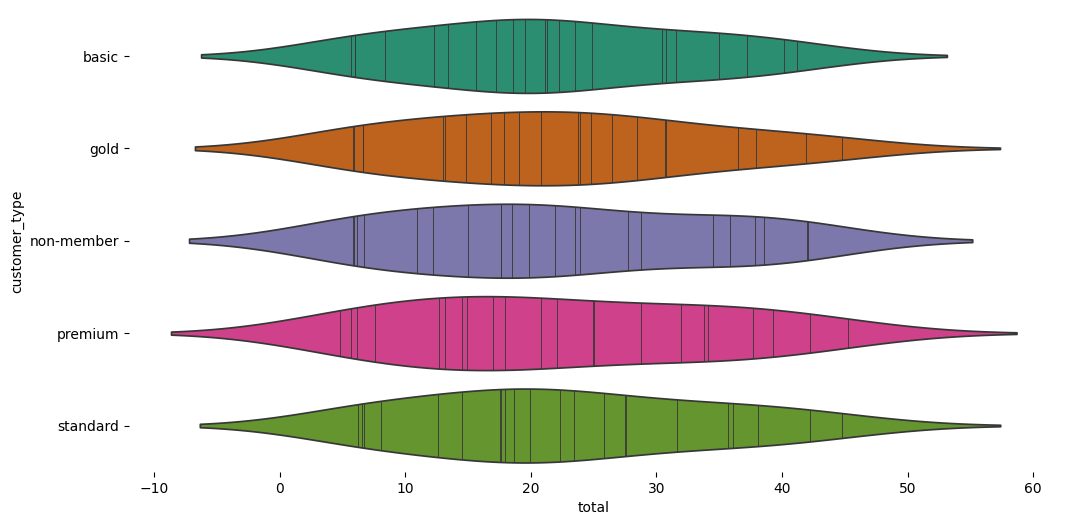

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df1_order['customer_type'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df1_order, x='total', y='customer_type', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

shows that premium customers are highly spreadout throughout the dataset.

In [ ]:
# creating pivot table to better understand the count of categories wrt total
df1_pivtable= df1_order.pivot(index= "category", columns="customer_type")
df1_pivtable

NameError: name 'df1_order' is not defined

In [ ]:
# comparison between different predictors
df1_comp1= df1[["category","payment_type","total"]]
df1_order1= df1_comp1.groupby(["category","payment_type"],as_index=False).mean()
df1_order1

,category,payment_type,total
0,baby products,cash,29.122963
1,baby products,credit card,31.659400
2,baby products,debit card,29.939273
3,baby products,e-wallet,29.272308
4,baked goods,cash,18.282583
...,...,...,...
83,spices and herbs,e-wallet,6.903143
84,vegetables,cash,5.947387
85,vegetables,credit card,6.275000
86,vegetables,debit card,5.345022


In [ ]:
df1_pivtable1= df1_order1.pivot(index= "category", columns="payment_type")
df1_pivtable1

total                                  
payment_type                cash credit card debit card   e-wallet
category                                                          
baby products          29.122963   31.659400  29.939273  29.272308
baked goods            18.282583   18.166174  19.136931  19.928598
baking                 16.183731   11.190345  12.561406  12.193867
beverages              35.484886   30.473506  35.431806  29.850313
canned foods           17.843810   14.360000  16.089519  14.433932
cheese                 22.114267   23.561600  24.942857  22.954242
cleaning products      33.093059   31.943902  32.643750  32.167869
condiments and sauces  16.396379   15.584722  19.807826  16.790244
dairy                  19.394270   21.769691  20.170000  19.090000
frozen                 24.640400   26.448000  25.124107  24.281111
fruit                   6.621571    5.824205   6.203016   6.003419
kitchen                39.234000   39.542245  35.456489  36.946667
meat                   37.935905   38.358352  35.691928  35.592233
medicine               39.464074   44.090588  44.815357  42.383077
packaged foods         13.272887   12.522459  13.225481  10.886759
personal care          23.142500   25.712000  23.238636  20.764545
pets                   29.182917   28.200263  24.926500  21.042857
refrigerated items     17.415664   16.338559  17.805532  18.515701
seafood                45.380345   42.577027  43.205263  39.208594
snacks                  6.200244    6.938033   5.385156   4.980179
spices and herbs        8.568485    8.182308   6.753226   6.903143
vegetables              5.947387    6.275000   5.345022   6.525584

shows that: seafood, medicines, meat, beverages are the most bought items by the customers.

In [ ]:
# comparison between different predictors
df1_comp2= df1[["category","customer_type","payment_type","total"]]
df1_order2= df1_comp2.groupby(["category","customer_type","payment_type"],as_index=False).mean()
df1_order2

,category,customer_type,payment_type,total
0,baby products,basic,cash,26.897778
1,baby products,basic,credit card,33.481000
2,baby products,basic,debit card,38.746923
3,baby products,basic,e-wallet,27.354118
4,baby products,gold,cash,36.493000
...,...,...,...,...
435,vegetables,premium,e-wallet,6.488974
436,vegetables,standard,cash,6.839487
437,vegetables,standard,credit card,5.670732
438,vegetables,standard,debit card,5.012195


In [ ]:
df1_pivtable2= df1_order2.pivot(index= "category", columns=["customer_type","payment_type"])
df1_pivtable2

total                                               \
customer_type              basic                                         gold   
payment_type                cash credit card debit card   e-wallet       cash   
category                                                                        
baby products          26.897778   33.481000  38.746923  27.354118  36.493000   
baked goods            18.704615   18.009091  23.568421  18.395000  20.572941   
baking                 14.747222   10.054545  14.261250  13.263750  16.750000   
beverages              34.737273   28.263571  29.624706  26.388462  28.682857   
canned foods           11.377273   17.164444  19.522800  14.199583  18.790588   
cheese                 27.183750   21.851538  24.178462  21.600000  25.191250   
cleaning products      32.743158   25.941111  33.365000  32.913000  27.600769   
condiments and sauces  16.750909   16.536000  22.852727  16.500000  19.918462   
dairy                  22.670909   21.493500  22.433000  18.606000  19.070000   
frozen                 27.364000   21.456364  29.373750  23.435625  22.521111   
fruit                   6.222121    6.732881   5.914444   5.023265   6.732286   
kitchen                41.186087   34.341500  34.345000  38.483500  40.154000   
meat                   35.971852   41.656111  27.906667  32.805556  38.185789   
medicine               39.946667   39.532500  43.181250  36.090000  35.481667   
packaged foods         13.447308   11.247600  12.849355  11.520833  11.815652   
personal care          23.825000   26.495556  18.362857  16.118750  17.049000   
pets                   25.240000   25.330000  18.408571  20.880000  36.230000   
refrigerated items     14.846250   15.181538  21.403125  19.089167  14.545789   
seafood                43.453000   44.450769  39.789231  35.476250  52.791111   
snacks                  5.720625    6.645333   4.975385   6.358667   6.607333   
spices and herbs       12.340000    7.510000   6.475000   8.595000   4.275000   
vegetables              5.881282    6.610968   4.898696   5.522727   7.191622   

                                                                    \
customer_type                                           non-member   
payment_type          credit card debit card   e-wallet       cash   
category                                                             
baby products           33.736667  24.609000  21.019286  23.340000   
baked goods             23.441176  17.193333  22.887778  16.833200   
baking                   9.627500  11.967273  14.108261  17.326000   
beverages               27.303000  36.774545  30.079167  38.933571   
canned foods            12.064737  14.305385  14.630714  22.333529   
cheese                  25.222500  28.677692  27.188333  19.125294   
cleaning products       34.477647  28.799286  31.134167  33.767222   
condiments and sauces   15.208333  19.012727  14.378571  19.845714   
dairy                   21.554375  17.477778  18.232500  20.670345   
frozen                  29.339167  26.184545  19.664444  23.682308   
fruit                    4.281186   6.494130   6.315439   5.802391   
kitchen                 38.338947  37.042308  35.517727  38.445000   
meat                    36.542381  37.880000  33.885217  45.501667   
medicine                50.282000  34.226364  44.714286  36.634286   
packaged foods          12.779524  14.538889  12.697826  14.029032   
personal care           34.012727  19.869167  24.290000  27.683333   
pets                    27.827500  21.030000  16.840000  29.570833   
refrigerated items      19.531500  14.894444  18.223125  19.887333   
seafood                 43.259444  51.857500  38.004667  44.022500   
snacks                   7.092857   5.887273   3.357000   5.990667   
spices and herbs         7.774000   6.610000   6.317500   7.764286   
vegetables               7.036000   5.851860   6.373864   5.722264   

                                                                    \
customer_type                

above shows that most of the customers pay through cards(creditcard, debitcard), following cash and e-wallets at the end.

In [ ]:
df1['category'].idxmax # shows most frequent category is fruit

<bound method Series.idxmax of 0                   fruit
1                   fruit
2                   fruit
3                   fruit
4                   fruit
              ...        
7824    cleaning products
7825    cleaning products
7826    cleaning products
7827    cleaning products
7828    cleaning products
Name: category, Length: 7829, dtype: object>

In [ ]:
df1['category'].value_counts() # frequency of all the items present in the category column

fruit                    998
vegetables               846
packaged foods           507
baked goods              443
canned foods             431
refrigerated items       425
kitchen                  382
meat                     382
dairy                    375
beverages                301
cheese                   293
cleaning products        292
baking                   264
snacks                   263
frozen                   263
seafood                  253
medicine                 243
baby products            224
condiments and sauces    181
personal care            177
pets                     161
spices and herbs         125
Name: category, dtype: int64

In [ ]:
df1['payment_type'].value_counts()  # cash is the most used payment_type

cash           2027
credit card    1949
e-wallet       1935
debit card     1918
Name: payment_type, dtype: int64

<Axes: xlabel='payment_type', ylabel='category'>

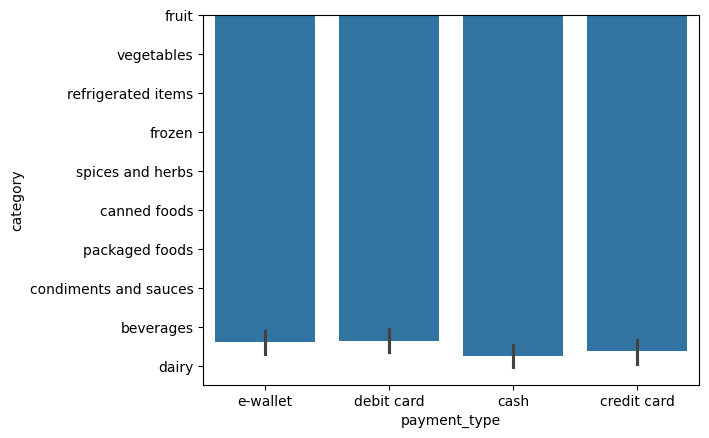

In [ ]:
sns.barplot(y="category",x="payment_type",data=df1)

<Axes: xlabel='payment_type', ylabel='Unnamed: 0'>

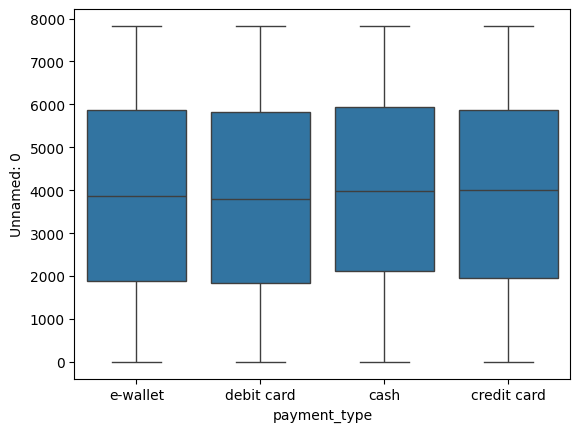

In [ ]:
sns.boxplot(x="payment_type",y="Unnamed: 0",data=df1)

**SUMMARY**

1. Overall, the data seems biased.
2. we need more training data to generate a best model for predictors.
3. Need more data based on the weekdays and weekend shopping by customers.
4. Need more data based on different timezones(morning, afternoon, evening, night) to get a more clearer way of customer behaviour while purchasing stuffs from the grocery retail.
